In [1]:
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# import modin.pandas as pd
# # from modin.config import ProgressBar
# # ProgressBar.enable()
# import ray

# ray.init()  # Start the Ray runtime for single-node
# import os

# os.environ["__MODIN_AUTOIMPORT_PANDAS__"] = "1"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('train_final.parquet/train_final.parquet')

In [4]:
df.head()

id  month  n_seconds_1  n_seconds_2  n_seconds_3  \
0  5beefd4d2bf4a4767e0df8108     10     5245.571      981.182      205.948   
1  867285b116c063d5a8482f5be     10     5184.876      557.650      487.587   
2  c82a7cbd2e00d9b66c06bcadc     10     3835.618     3275.128       43.806   
3  f2d2b25073ccc298eced86897     10     3532.544      154.509       64.724   
4  7818c92a58af0f2cb7c361738     10     3344.192      787.896      715.115   

        carrier devicebrand  feature_0  feature_1  feature_2  ...  feature_41  \
0   VODAFONE TR       Apple  -1.197737   1.113360  -1.123334  ...   -2.613336   
1      TURKCELL     samsung  -2.336352   2.567766  -0.494908  ...   -0.983938   
2  TURK TELEKOM       Redmi  -2.561455   2.061736  -0.184511  ...   -1.668703   
3      TURKCELL     samsung  -2.529918   3.358050  -0.851366  ...   -1.861418   
4   VODAFONE TR     samsung  -2.922361   2.096124   0.060796  ...   -0.142903   

   feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0   -2.032903    2.645719   -1.023478    1.658986   -1.559406   -2.161336   
1   -1.453756   -0.021547   -0.195770    2.775513   -0.318980   -4.291473   
2   -3.599403    1.673868    0.631790    1.293131   -2.230909   -2.383524   
3   -1.219658    1.863495    0.213170    1.029710   -1.142185   -4.466191   
4   -1.875545    1.024499   -0.186423   -0.061626   -1.462175   -2.371206   

   feature_48  feature_49               target  
0          30          58  menu2, menu4, menu5  
1          21          45  menu7, menu8, menu4  
2          19          61  menu2, menu8, menu4  
3           2          41  menu6, menu2, menu1  
4          23          85  menu6, menu2, menu8  

[5 rows x 58 columns]

In [5]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [6]:
df.describe(include = [np.number]).T

count        mean         std        min         25%  \
month        94049.0   11.311561    0.732301  10.000000   11.000000   
n_seconds_1  94049.0  432.781818  429.834018  41.850000  181.540000   
n_seconds_2  94049.0  197.904016  169.474603  40.231000   91.886000   
n_seconds_3  94049.0  102.381759   80.533643  40.001000   53.746000   
feature_0    94049.0   -1.824932    0.706014  -5.009604   -2.290048   
feature_1    94049.0    1.948002    0.742521  -1.190684    1.443627   
feature_2    94049.0   -0.014231    0.855615  -4.988702   -0.560076   
feature_3    94049.0   -0.270988    1.001878  -4.205721   -0.950880   
feature_4    94049.0    3.428983    0.886168  -2.057158    2.891524   
feature_5    94049.0    2.314612    0.765429  -1.572397    1.805311   
feature_6    94049.0    0.755425    0.693982  -4.834940    0.325458   
feature_7    94049.0    0.548228    0.661974  -2.195450    0.105707   
feature_8    94049.0    0.833412    0.841732  -3.326162    0.273083   
feature_9    94049.0   -3.767522    0.889535  -8.526143   -4.336629   
feature_10   94049.0   -0.369005    0.765716  -3.954992   -0.878516   
feature_11   94049.0   -0.589353    1.139881  -4.934422   -1.368981   
feature_12   94049.0    2.821010    0.811651  -2.087638    2.289633   
feature_13   94049.0   -0.905132    0.723011  -4.598442   -1.376837   
feature_14   94049.0    3.181226    0.757027  -1.022491    2.715526   
feature_15   94049.0   -1.994700    0.722838  -5.366724   -2.484966   
feature_16   94049.0   -1.851954    0.754639  -5.337937   -2.352533   
feature_17   94049.0   -2.106079    0.621185  -4.869550   -2.516640   
feature_18   94049.0    0.050925    0.896424  -3.615648   -0.556159   
feature_19   94049.0   -1.665830    0.826646  -5.573031   -2.223632   
feature_20   94049.0    1.556449    0.828227  -2.597264    1.043992   
feature_21   94049.0    1.147143    1.068714  -3.060436    0.387469   
feature_22   94049.0   -0.630579    0.838008  -4.513334   -1.210363   
feature_23   94049.0   -0.222904    0.610597  -3.731376   -0.623985   
feature_24   94049.0    0.618776    0.801722  -3.401492    0.106125   
feature_25   94049.0   -0.022954    0.988039  -4.252494   -0.657601   
feature_26   94049.0    1.236582    0.903148  -3.384988    0.715286   
feature_27   94049.0   -1.333063    0.850496  -4.768601   -1.902450   
feature_28   94049.0    0.647161    0.747731  -3.561114    0.154396   
feature_29   94049.0   -1.053488    0.773743  -4.438785   -1.578479   
feature_30   94049.0    0.350096    0.989794  -5.986885   -0.295642   
feature_31   94049.0    3.011839    0.756453  -2.505686    2.564092   
feature_32   94049.0   -0.205500    0.681084  -4.364327   -0.640254   
feature_33   94049.0    0.716313    0.686690  -4.297767    0.279917   
feature_34   94049.0    0.113462    0.905281  -4.068053   -0.502068   
feature_35   94049.0   -5.909519    0.606830  -8.035002   -6.324248   
feature_36   94049.0    1.244454    0.740334  -1.788131    0.749599   
feature_37   94049.0    0.653498    0.793515  -2.525164    0.107629   
feature_38   94049.0   -2.859309    0.746946  -6.736732   -3.353120   
feature_39   94049.0   -1.196948    0.944416  -6.033741   -1.814194   
feature_40   94049.0    1.055930    0.745859  -3.565546    0.587355   
feature_41   94049.0   -1.247314    0.767093  -4.956211   -1.736227   
feature_42   94049.0   -1.863433    0.812613  -6.151754   -2.396253   
feature_43   94049.0    1.042226    0.910212  -3.265827    0.431905   
feature_44   94049.0    0.260601    0.797621  -3.735571   -0.252991   
feature_45   94049.0    0.737817    0.837250  -3.631153    0.161747   
feature_46   94049.0   -0.683078    0.858325  -4.166801   -1.279131   
feature_47   94049.0   -2.333848    0.642435  -5.680349   -2.753271   
feature_48   94049.0   20.531978    8.310330   1.000000   15.000000   
feature_49   94049.0   50.843943   12.950021  20.000000   41.000000   

                    50%         75%           max  
month         11.000000   12.000000     12.000000  
n_sec

In [7]:
df.describe(include = ['int64']).T

count       mean        std   min   25%   50%   75%    max
month       94049.0  11.311561   0.732301  10.0  11.0  11.0  12.0   12.0
feature_48  94049.0  20.531978   8.310330   1.0  15.0  21.0  26.0   68.0
feature_49  94049.0  50.843943  12.950021  20.0  41.0  50.0  60.0  102.0

In [8]:
df.describe(include = ['O']).T

count unique                        top   freq
id           94049  80478  60f93207a330776bbe5bd4fb2      3
carrier      94049    556                   TURKCELL  39043
devicebrand  94049     64                      Apple  33238
target       94049    112        menu6, menu2, menu8  13583

In [9]:
# check why carrier column was assigned object data type
df['carrier'].unique()
# there are values such as O2-DE which is why this column was assigned an object type. there are also irrelevant carrier names. can create or obtain a list of valid carrier names using beautiful soup,
# compare them to the ones here, assign NaN values to the ones not in the list and then use an appropriate method (such as missforest) to fill them in but I won't do it here.

array(['VODAFONE TR', 'TURKCELL', 'TURK TELEKOM', 'TELEKOM.DE', 'Unknown',
       'BIMCELL', 'PTTCELL', 'TEKNOSACELL', 'O2-DE', 'KKTCELL',
       'CUMHURIYET', 'TR TURKCELL', 'VODAFONE', 'CAPA', 'IAM', 'VERIZON',
       'LIFECELL TR', 'STC KSA RIBF2022', 'SULEYMAN YAGIZ ', '3 AT',
       'HAYATEVESIGAR', 'XFINITY MOBILE', 'GSMOBILE', 'FENERCELL',
       'O2 - DE+', 'TELIA', 'VODAFONE UK', '1&1', 'BASE', 'CLARO PERU',
       'F-BOUYGUES TELECOM', 'VODAFONE RO', 'OZLEM', 'GEOCELL',
       'TRABZONCELL', 'KPN NL', 'ERTANZULAL', 'O2 - DE', 'KOREK',
       'SUNRISE', 'Z 4.5G+', 'MEDIONMOBILE', 'METIN', 'DIVERSEY KIMYA',
       'AYYILDIZ.DE', 'EVATIS', ' ', 'ZAIN IQ', 'TELEKOM.RO', 'AVEA',
       'FENERCELL-AVEA', 'HYPNOGAJA', 'IBRAHIM KUTSI ', 'VODAFONE.DE',
       'GAYETIYICEKIYOR', 'UAE 51 ETISALAT', 'VODA AU', 'OSMAN SARIKAYA ',
       'ETISALAT', 'ORANGE F', 'VODAFONE IT', 'SALT', 'ELUX',
       'MUTLU YILLAR', 'WTTC KSA', 'VIRGIN', 'CARRIER', 'BEELINE',
       'ILIAD', 'BURAK', 'UZB UC

In [10]:
# check why devicebrand was assigned object data type
df['devicebrand'].unique()

array(['Apple', 'samsung', 'Redmi', 'HUAWEI', 'POCO', 'OPPO', 'Sony',
       'vivo', 'asus', 'gm', 'Alcatel', 'xiaomi', 'reeder', 'HONOR',
       'OMIX', 'Lenovo', 'realme', 'Meizu', 'TCL', 'GM', 'Vestel',
       'TECNO', 'lge', 'Casper', 'CASPER', 'motorola', 'OnePlus', 'htc',
       'Turk_Telekom', 'Nokia', 'Ulefone', 'google', 'HIKING', 'Reeder',
       'Trident', 'ZTE', 'generalmobile', 'blackberry', 'Elephone',
       'Hytera', 'Blackview', 'DOOGEE', 'SuperD', 'OUKITEL', 'Infinix',
       'Vodafone', 'Realme', 'UMIDIGI', 'nubia', 'Huawei', 'meizu',
       'Nothing', 'DIJITSU', 'HTC', 'HiKING', 'TURKCELL', 'Fairphone',
       'iBRIT', 'KAAN', 'Cat', 'HOMETECH', 'WIKO', 'Gigaset',
       'blackshark'], dtype=object)

In [11]:
df.select_dtypes(include = ['int64']).columns

Index(['month', 'feature_48', 'feature_49'], dtype='object')

In [12]:
df.select_dtypes(include = ['float64']).columns

Index(['n_seconds_1', 'n_seconds_2', 'n_seconds_3', 'feature_0', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47'],
      dtype='object')

In [13]:
# check for missing data in the dataset
df.isnull().any().any()

False

In [14]:
cat_cols = df.select_dtypes(include = ['O']).drop(['id', 'target'], axis = 1).columns.tolist()
cat_cols

['carrier', 'devicebrand']

In [15]:
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
num_cols

['month',
 'n_seconds_1',
 'n_seconds_2',
 'n_seconds_3',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49']

In [16]:
df.select_dtypes(include = ['O']).drop(['id', 'target'], axis = 1).columns

Index(['carrier', 'devicebrand'], dtype='object')

In [17]:
# check if users entered space(s) instead of a proper carrier/devicebrand name and store the indices of these values
indices = {}
for col in cat_cols:
    indices[col] = df[col][df[col].str.match(r'\s+(?!\w+)')].index

In [18]:
indices # only carrier has such value

{'carrier': Index([1541], dtype='int64'),
 'devicebrand': Index([], dtype='int64')}

In [19]:
# drop that index. can also assign it a NaN value and then use the appropriate method to fill it in but I won't do it here.
df.drop(index = indices['carrier'], inplace = True)
df.reset_index(drop = True, inplace = True)

In [20]:
df.carrier.str.endswith(' ').any(), df.carrier.str.startswith(' ').any()

(True, True)

In [21]:
for col in df.select_dtypes(include='object').columns.tolist():
    if df[col].str.startswith(' ').any() or df[col].str.endswith(' ').any(): df[col] = df[col].str.strip()

In [22]:
df.carrier.str.endswith(' ').any(), df.carrier.str.startswith(' ').any()

(False, False)

In [23]:
df = df.assign(menu1=np.zeros(df.shape[0]),
         menu2=np.zeros(df.shape[0]),
         menu3=np.zeros(df.shape[0]),
         menu4=np.zeros(df.shape[0]),
         menu5=np.zeros(df.shape[0]),
         menu6=np.zeros(df.shape[0]),
         menu7=np.zeros(df.shape[0]),
         menu8=np.zeros(df.shape[0]),
         menu9=np.zeros(df.shape[0])
        )

In [24]:
def assign_menus(menus):
    row_to_insert = np.zeros(9)
    for menu in menus.strip().split(', '):
        row_to_insert[int(menu[-1]) - 1] = 1
    return row_to_insert

In [25]:
menus = df.filter(like='menu').columns.tolist()
df.loc[:, menus] = df.target.apply(assign_menus).tolist()

In [26]:
df.head(1)

id  month  n_seconds_1  n_seconds_2  n_seconds_3  \
0  5beefd4d2bf4a4767e0df8108     10     5245.571      981.182      205.948   

       carrier devicebrand  feature_0  feature_1  feature_2  ...  \
0  VODAFONE TR       Apple  -1.197737    1.11336  -1.123334  ...   

                target  menu1  menu2  menu3  menu4  menu5  menu6  menu7  \
0  menu2, menu4, menu5    0.0    1.0    0.0    1.0    1.0    0.0    0.0   

   menu8  menu9  
0    0.0    0.0  

[1 rows x 67 columns]

In [27]:
# check whether the row-based sum of menu1-menu9 is 3

(df.iloc[:,-9:].sum(axis=1) == 3).all()

True

In [28]:
df.id.str.endswith(' ').any(), df.id.str.startswith(' ').any()

(False, False)

In [29]:
# number of unique ids that used the app the most during the 3 month period
(df.id.value_counts() == df.id.value_counts().max()).sum()

1375

In [30]:
# ids that used the app the most during the 3 month period
top_ids = df['id'].value_counts()[(df.id.value_counts() == df.id.value_counts().max())].index.tolist()
len(top_ids)

1375

In [31]:
# dataframe containing the top_ids only
top_ids_df = df[df.id.isin(top_ids)]
top_ids_df.shape

(4125, 67)

In [32]:
# check if they used the same carrier during this period. answer is yes.
(top_ids_df.groupby('id')['carrier'].nunique() == 1).all()

True

In [33]:
# find the top 10 carriers they used
top_ids_df.carrier.value_counts().iloc[0:10].index.tolist()

['TURKCELL',
 'TURK TELEKOM',
 'VODAFONE TR',
 'BIMCELL',
 'KKTCELL',
 'TEKNOSACELL',
 'HAYATEVESIGAR',
 'PTTCELL',
 'VODAFONE',
 'Unknown']

In [34]:
# check how many times they used the app in each month.
wdf = top_ids_df.groupby('id')['month'].value_counts().unstack()
wdf
# can also use pd.crosstab(top_ids_df.id, top_ids_df.month)

month                      10  11  12
id                                   
0027bf40d982fce88efa58cd4   1   1   1
0029b20b5c4ebdabfeffa44e0   1   1   1
0031368cce795a3fd483a8d84   1   1   1
006a661154731438735db90d2   1   1   1
007f7fd58cd76f422d608aa64   1   1   1
...                        ..  ..  ..
fea343f30a2b9a0a84725fc71   1   1   1
feede706b089f015b3ff8e4d2   1   1   1
ff0e6df1b3e59ccf9ca7afbd2   1   1   1
ff230d27aba2f599b9d4f915f   1   1   1
ff3846771fbf3fce35857e352   1   1   1

[1375 rows x 3 columns]

In [35]:
wdf.rename(columns = {10: 'mon10', 11: 'mon11', 12: 'mon12'}, inplace = True)

In [36]:
wdf

month                      mon10  mon11  mon12
id                                            
0027bf40d982fce88efa58cd4      1      1      1
0029b20b5c4ebdabfeffa44e0      1      1      1
0031368cce795a3fd483a8d84      1      1      1
006a661154731438735db90d2      1      1      1
007f7fd58cd76f422d608aa64      1      1      1
...                          ...    ...    ...
fea343f30a2b9a0a84725fc71      1      1      1
feede706b089f015b3ff8e4d2      1      1      1
ff0e6df1b3e59ccf9ca7afbd2      1      1      1
ff230d27aba2f599b9d4f915f      1      1      1
ff3846771fbf3fce35857e352      1      1      1

[1375 rows x 3 columns]

In [37]:
# is there an id that used the app more than once in any month? answer is no
wdf.query('mon10 > 1' or 'mon11 > 1' or 'mon12 > 1')

Empty DataFrame
Columns: [mon10, mon11, mon12]
Index: []

In [38]:
# check the menus they used.
wdf1 = top_ids_df.groupby('id')[menus].sum()
wdf1

menu1  menu2  menu3  menu4  menu5  menu6  menu7  \
id                                                                           
0027bf40d982fce88efa58cd4    2.0    0.0    0.0    3.0    0.0    2.0    0.0   
0029b20b5c4ebdabfeffa44e0    1.0    2.0    0.0    2.0    0.0    3.0    0.0   
0031368cce795a3fd483a8d84    0.0    2.0    0.0    1.0    0.0    3.0    0.0   
006a661154731438735db90d2    0.0    3.0    0.0    1.0    0.0    2.0    0.0   
007f7fd58cd76f422d608aa64    1.0    2.0    0.0    1.0    0.0    3.0    0.0   
...                          ...    ...    ...    ...    ...    ...    ...   
fea343f30a2b9a0a84725fc71    2.0    3.0    0.0    1.0    0.0    3.0    0.0   
feede706b089f015b3ff8e4d2    0.0    1.0    0.0    2.0    2.0    2.0    0.0   
ff0e6df1b3e59ccf9ca7afbd2    3.0    0.0    0.0    1.0    1.0    2.0    0.0   
ff230d27aba2f599b9d4f915f    0.0    3.0    0.0    0.0    2.0    3.0    0.0   
ff3846771fbf3fce35857e352    0.0    3.0    0.0    0.0    0.0    3.0    0.0   

                           menu8  menu9  
id                                       
0027bf40d982fce88efa58cd4    2.0    0.0  
0029b20b5c4ebdabfeffa44e0    1.0    0.0  
0031368cce795a3fd483a8d84    3.0    0.0  
006a661154731438735db90d2    1.0    2.0  
007f7fd58cd76f422d608aa64    2.0    0.0  
...                          ...    ...  
fea343f30a2b9a0a84725fc71    0.0    0.0  
feede706b089f015b3ff8e4d2    0.0    2.0  
ff0e6df1b3e59ccf9ca7afbd2    2.0    0.0  
ff230d27aba2f599b9d4f915f    1.0    0.0  
ff3846771fbf3fce35857e352    0.0    3.0  

[1375 rows x 9 columns]

In [39]:
# check the menus an id used.
wdf1.iloc[0][wdf1.iloc[0] != 0].index, wdf1.iloc[0][wdf1.iloc[0] != 0].values

(Index(['menu1', 'menu4', 'menu6', 'menu8'], dtype='object'),
 array([2., 3., 2., 2.]))

In [40]:
# create a dictionary that contains the info above using ids as keys
result_dic = {}

for index, row in wdf1.iterrows():
    cols = row[row != 0].index
    vals = row[row != 0].values
    intermediate_dic = {}
    for col, val in zip(cols, vals):
        intermediate_dic[col] = val
    result_dic[row.name] = intermediate_dic

In [41]:
# check the result
for key, value in result_dic.items():
    print(key)
    print(value)
    break

0027bf40d982fce88efa58cd4
{'menu1': 2.0, 'menu4': 3.0, 'menu6': 2.0, 'menu8': 2.0}


In [42]:
df = df.drop(columns = ['id', 'target'])

In [43]:
# check for row-based duplicates

df.drop_duplicates(inplace = True)

In [44]:
df.shape

(94048, 65)

In [45]:
target_list = df.filter(like = 'menu').columns.tolist()
target_list

['menu1',
 'menu2',
 'menu3',
 'menu4',
 'menu5',
 'menu6',
 'menu7',
 'menu8',
 'menu9']

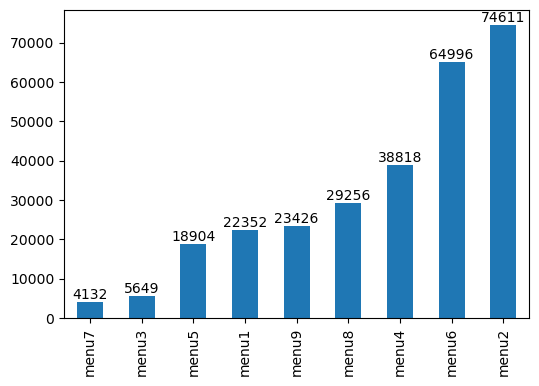

In [46]:
# check target distribution

plt.figure(figsize=(6,4))
a = df[target_list].sum().sort_values().plot.bar()
plt.bar_label(a.containers[0])
plt.show()

In [47]:
# check which menus appear together the most, for example menu 7,6,3. make a plot like the above. using value counts to combined menu values ([111000000] for example) should work.

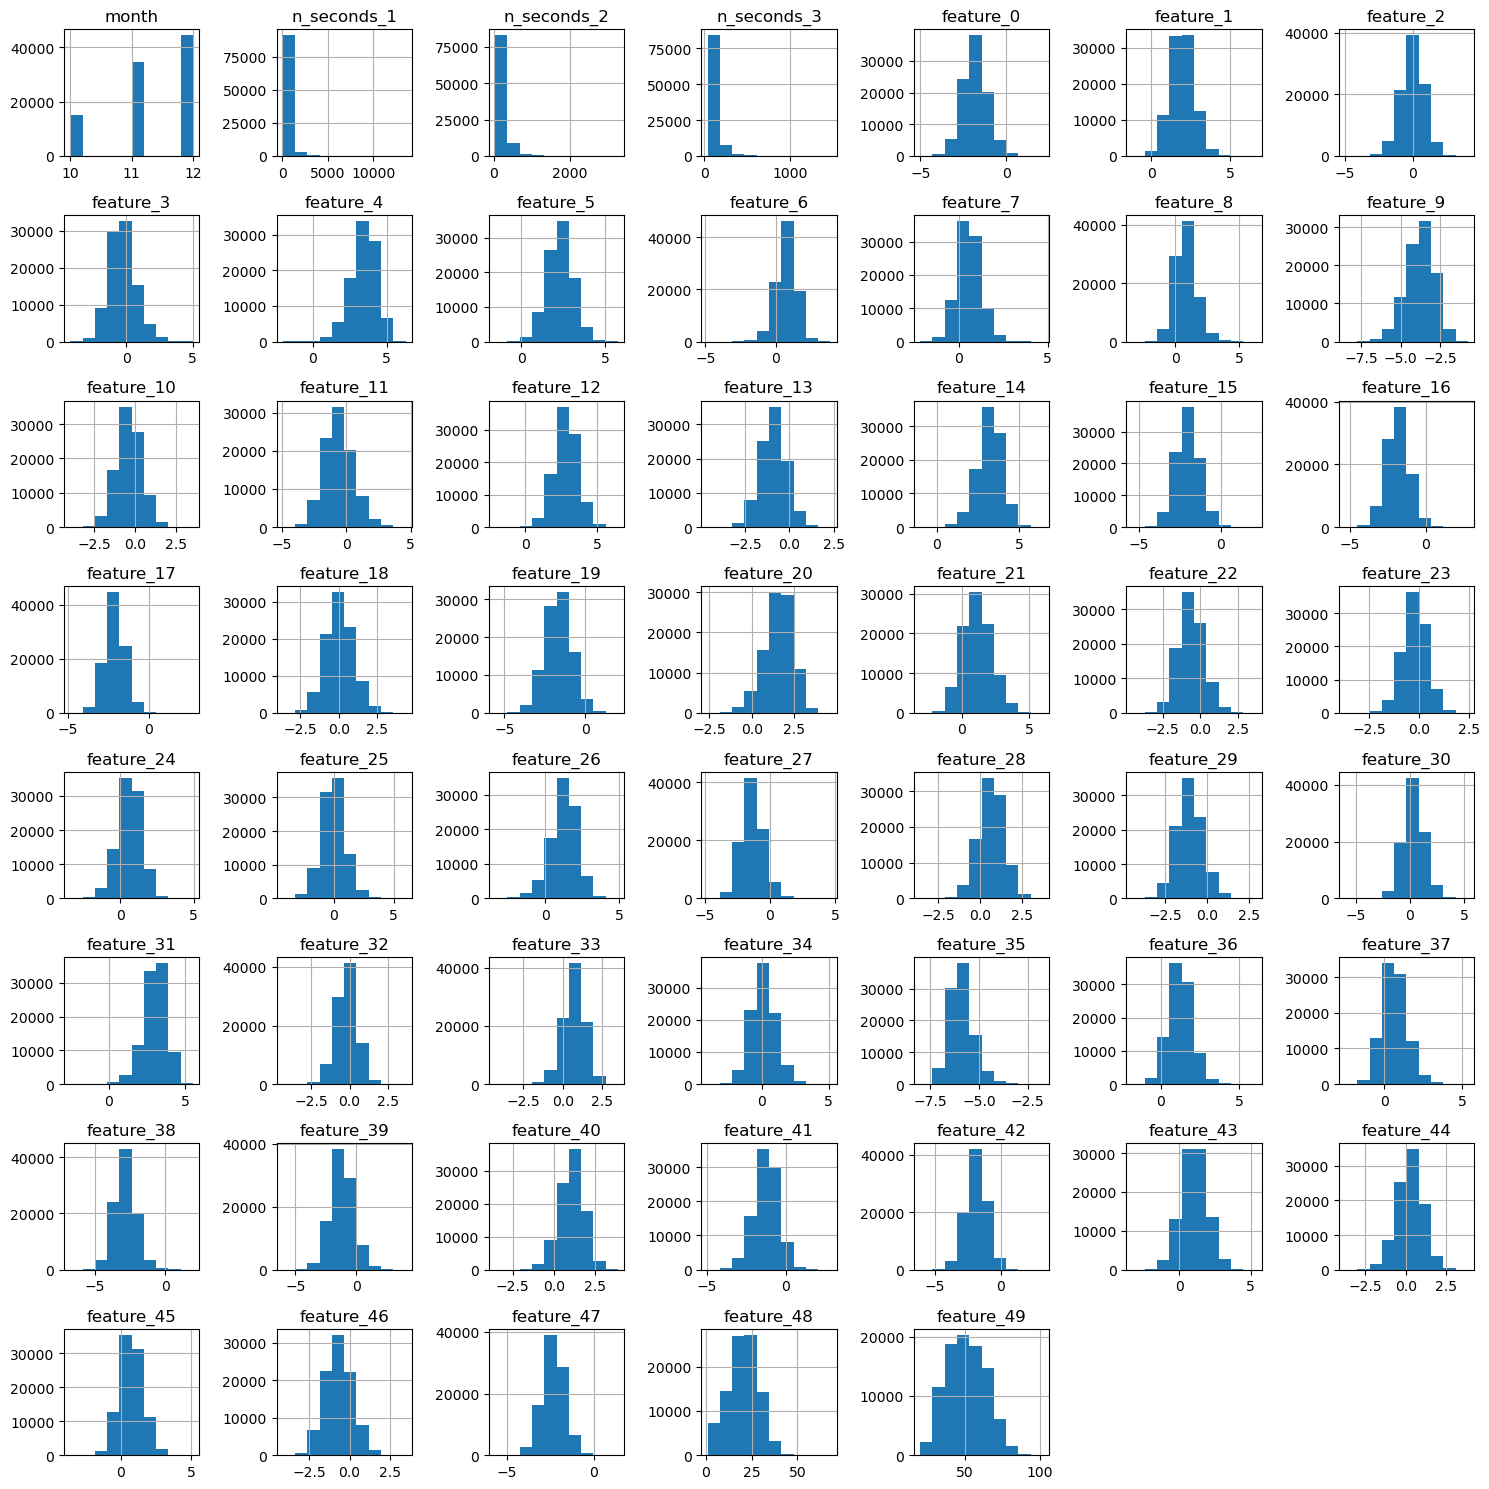

In [48]:
# check distribution of features

df.hist(column = df.columns[0:-9].tolist(), figsize = (15,15))
plt.tight_layout()
plt.show()

In [49]:
# temporary feature distribution check. transformations will be done using pipeline later on.

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)
df_copy = df.copy()
df_copy.drop(columns = ['devicebrand', 'carrier'], inplace = True)
df_copy_trans = pt.fit_transform(df_copy)

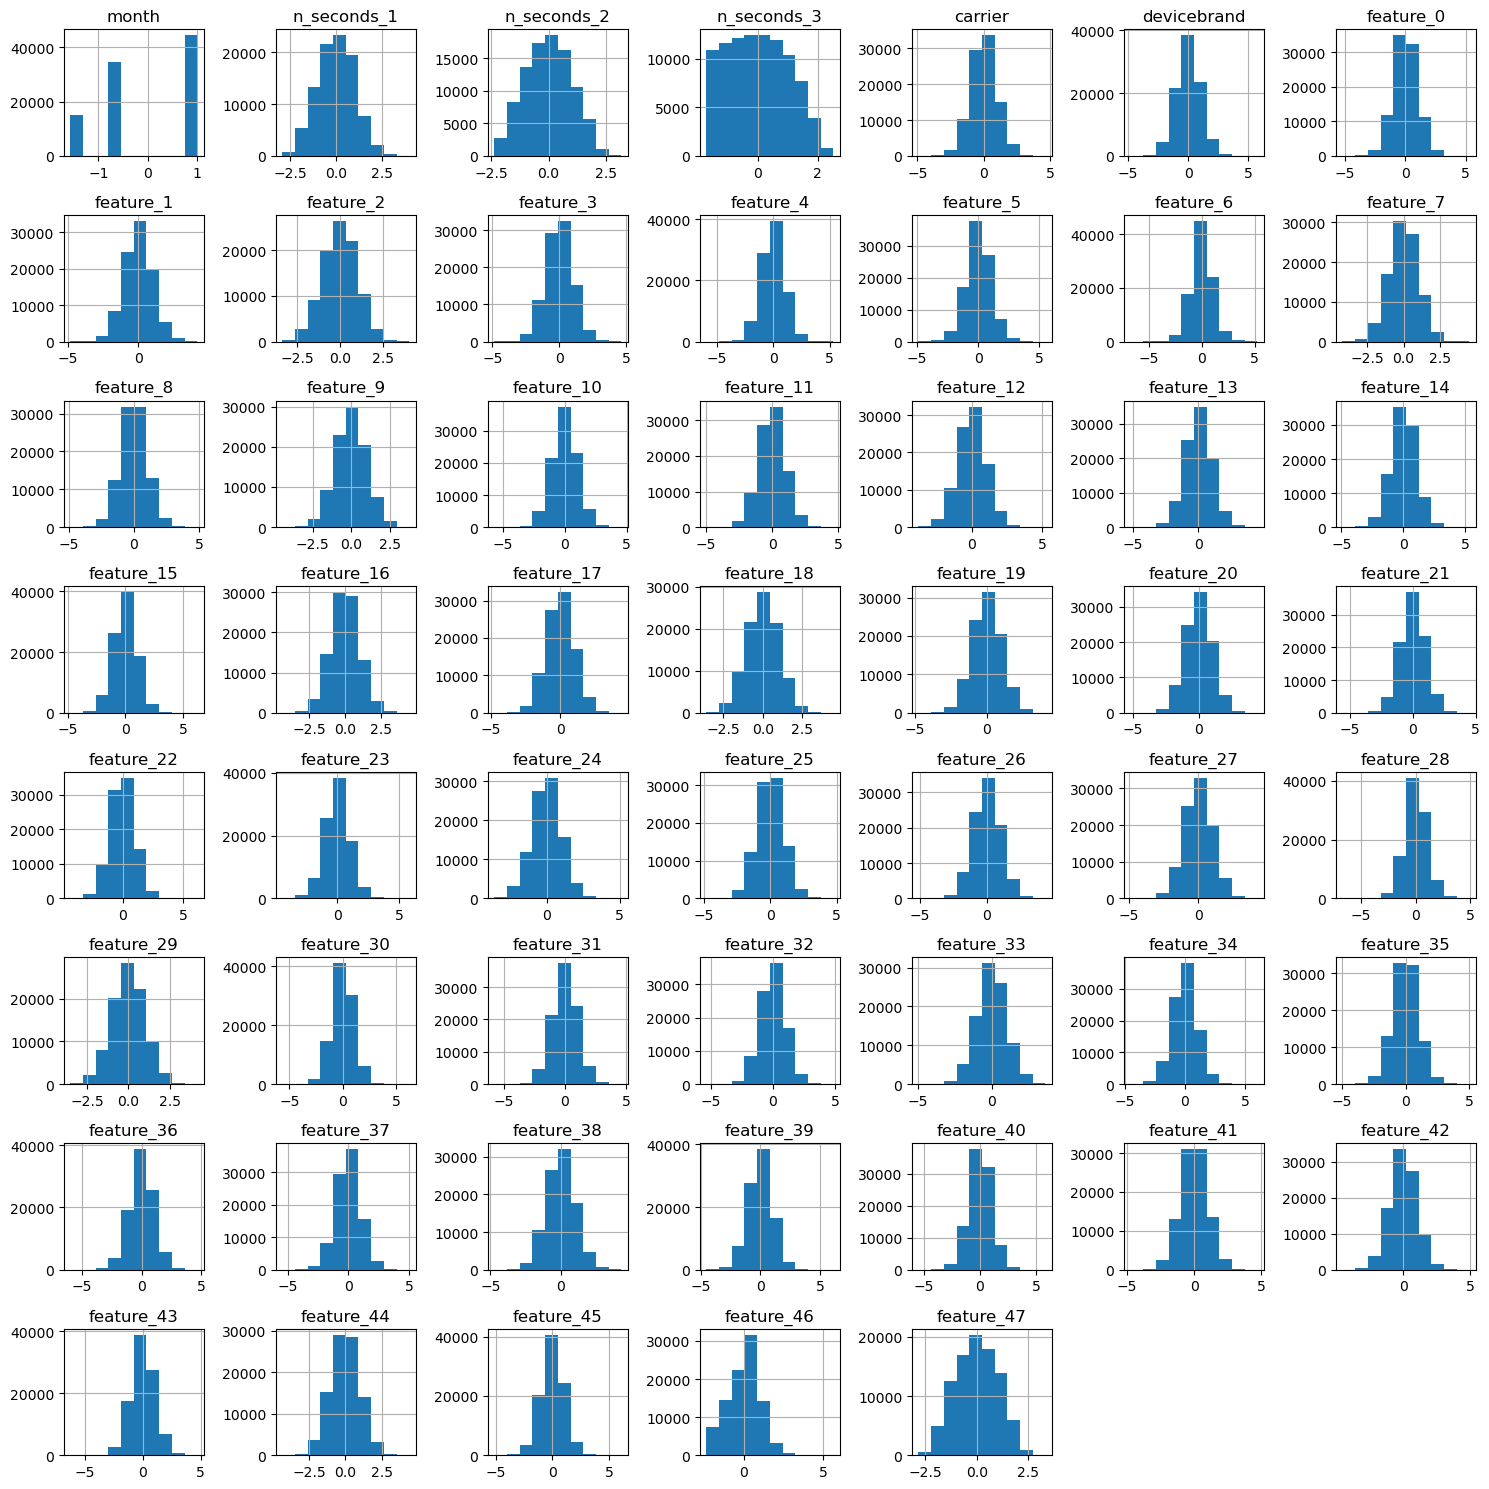

In [50]:
# check feature distributions after power transform

df_copy_trans = pd.DataFrame(df_copy_trans)
df_copy_trans.rename(columns = dict(zip(df_copy_trans.columns.tolist(), df.columns.tolist())), inplace = True)
df_copy_trans.hist(column = df_copy_trans.columns[0:-9].tolist(), figsize = (15,15)) 
plt.tight_layout()
plt.show()

In [51]:
df.carrier.value_counts().head(30) # I'll preprocess some of the carriers. similar operations can be done for the rest

carrier
TURKCELL            39044
VODAFONE TR         25583
TURK TELEKOM        22091
BIMCELL              1108
Unknown               684
KKTCELL               659
VODAFONE              560
HAYATEVESIGAR         559
TEKNOSACELL           498
PTTCELL               423
LIFECELL TR           177
FENERCELL             136
VODAFONE.DE           102
TR TURKCELL            97
O2-DE                  90
AVEA                   84
GSMOBILE               81
CARRIER                77
T-MOBILE               62
VODAFONE UK            59
ELUX                   56
CUMHURIYET             49
TEKNOSA                48
TELEKOM.DE             44
O2 - DE                42
MUTLU YILLAR           37
VODAFONE TÜRKIYE       36
TEKNOSACEL             29
FREE                   28
STC                    23
Name: count, dtype: int64

In [52]:
bm = df.carrier.str.isupper()
df.carrier[~bm].unique() # major categories aren't included besides Unknown. no need to change the case to search for carriers.

array(['Unknown', '1&1', 'عيش الحماس', '3', '938', '####', '中国移动',
       '286 026', 'ドコモ', '中国联通', '36801', '242734277'], dtype=object)

In [53]:
# check and combine TURKCELL carriers
BM = df.carrier.str.contains('TURKCELL')
df.carrier[BM]

1        TURKCELL
3        TURKCELL
5        TURKCELL
6        TURKCELL
8        TURKCELL
           ...   
94039    TURKCELL
94040    TURKCELL
94042    TURKCELL
94044    TURKCELL
94047    TURKCELL
Name: carrier, Length: 39150, dtype: object

In [54]:
df.carrier[BM].nunique(), df.carrier[BM].unique()

(8,
 array(['TURKCELL', 'TR TURKCELL', 'TURKCELLLLLL',
        'TURKCELL | AYYILDIZ.DE', 'TURKCELL KENAN', 'TURKCELL | ETISALAT',
        'TURKCELL LLETISIM HIZMETLERI A.S.', 'ORANGE | TURKCELL'],
       dtype=object))

In [55]:
df.carrier.replace(df.carrier[BM].unique().tolist(), ['TURKCELL']*df.carrier[BM].nunique(), inplace = True)

In [56]:
df.carrier[BM].nunique(), df.carrier[BM].unique()

(1, array(['TURKCELL'], dtype=object))

In [57]:
# do the same for VODAFONE carriers
BM = df.carrier.str.contains('VODA')
df.carrier[BM].nunique(), df.carrier[BM].unique()

(27,
 array(['VODAFONE TR', 'VODAFONE', 'VODAFONE UK', 'VODAFONE RO',
        'VODAFONE.DE', 'VODA AU', 'VODAFONE IT', 'VODAFONE TÜRKIYE',
        'VODAFONE TR,', 'VODAFONE NL', 'VODAFONE TURKIYE', 'VODAFONE IE',
        'VODACOM SA', 'VODAFONE AU', 'VODAFONE P', 'RO VODAFONE RO',
        'VODAFONE OM', 'VODAFONE ES', 'VODAFONE HU', 'VODAFONE UA',
        'VODACOM', 'VODAFONE QA', 'VODAFONE.DE | TURK TELEKOM',
        'VODAFONE CZ', 'VODAFONE QATAR', 'VODAFONE GR', 'VODAFONE AL'],
       dtype=object))

In [58]:
df.carrier[BM].value_counts()

carrier
VODAFONE TR                   25583
VODAFONE                        560
VODAFONE.DE                     102
VODAFONE UK                      59
VODAFONE TÜRKIYE                 36
VODAFONE TURKIYE                 14
VODAFONE RO                      11
VODAFONE IT                      11
VODAFONE NL                      11
VODAFONE IE                       7
VODAFONE HU                       6
VODAFONE QA                       5
VODACOM                           5
VODA AU                           4
VODAFONE ES                       3
VODAFONE AU                       3
VODAFONE UA                       2
VODAFONE TR,                      2
VODAFONE.DE | TURK TELEKOM        2
VODAFONE OM                       1
RO VODAFONE RO                    1
VODAFONE P                        1
VODACOM SA                        1
VODAFONE CZ                       1
VODAFONE QATAR                    1
VODAFONE GR                       1
VODAFONE AL                       1
Name: count, dtype: 

In [59]:
df.carrier.replace(['VODAFONE.DE | TURK TELEKOM', 'VODAFONE.DE', 'VODAFONE TÜRKIYE', 'VODAFONE TURKIYE', 'VODAFONE TR,', 'RO VODAFONE RO', 'VODACOM SA', 'VODA AU', 'VODACOM'], 
                   ['VODAFONE DE', 'VODAFONE DE', 'VODAFONE TR', 'VODAFONE TR', 'VODAFONE TR', 'VODAFONE RO', 'VODAFONE SA', 'VODAFONE AU', 'VODAFONE'], 
                   inplace = True)

In [60]:
df.carrier[BM].value_counts()

carrier
VODAFONE TR       25635
VODAFONE            565
VODAFONE DE         104
VODAFONE UK          59
VODAFONE RO          12
VODAFONE IT          11
VODAFONE NL          11
VODAFONE AU           7
VODAFONE IE           7
VODAFONE HU           6
VODAFONE QA           5
VODAFONE ES           3
VODAFONE UA           2
VODAFONE CZ           1
VODAFONE GR           1
VODAFONE QATAR        1
VODAFONE P            1
VODAFONE OM           1
VODAFONE SA           1
VODAFONE AL           1
Name: count, dtype: int64

In [61]:
# check and combine TELEKOM carriers
BM = df.carrier.str.contains('TELEKOM')
df.carrier[BM]

2        TURK TELEKOM
10       TURK TELEKOM
14       TURK TELEKOM
17         TELEKOM.DE
18       TURK TELEKOM
             ...     
94027    TURK TELEKOM
94028    TURK TELEKOM
94029    TURK TELEKOM
94032    TURK TELEKOM
94046    TURK TELEKOM
Name: carrier, Length: 22179, dtype: object

In [62]:
df.carrier[BM].nunique(), df.carrier[BM].unique()

(21,
 array(['TURK TELEKOM', 'TELEKOM.DE', 'TELEKOM.RO',
        'TELEKOM.DE | TURK TELEKOM', 'TURK TELEKOM | AVEA',
        'T-MOBILE | TURK TELEKOM', 'TELEKOM.DE | MOBILCOM-DEBITEL',
        'O2 - DE | TURK TELEKOM', 'TURK TELEKOM | 3', 'TELEKOM.AL',
        'TELEKOM.ME', 'TURK TELEKOM | AYCELL-ARIA', 'TELEKOM.MK',
        'TÜRK TELEKOM', 'TURK TELEKOM,', 'TURK TELEKOM | A R I A',
        'PROXIMUS | TURK TELEKOM', 'BH MOBILE | TURK TELEKOM',
        'TELEKOM SK', 'T-MOBILE-NL | TURK TELEKOM', 'TURKTELEKOM'],
       dtype=object))

In [63]:
df.carrier[BM].value_counts()

carrier
TURK TELEKOM                     22091
TELEKOM.DE                          44
TURK TELEKOM | AVEA                 17
T-MOBILE | TURK TELEKOM              3
TURK TELEKOM | AYCELL-ARIA           3
TELEKOM.MK                           3
TELEKOM.RO                           2
O2 - DE | TURK TELEKOM               2
TELEKOM.AL                           2
TURK TELEKOM | A R I A               1
T-MOBILE-NL | TURK TELEKOM           1
TELEKOM SK                           1
BH MOBILE | TURK TELEKOM             1
PROXIMUS | TURK TELEKOM              1
TELEKOM.ME                           1
TURK TELEKOM,                        1
TÜRK TELEKOM                         1
TURK TELEKOM | 3                     1
TELEKOM.DE | MOBILCOM-DEBITEL        1
TELEKOM.DE | TURK TELEKOM            1
TURKTELEKOM                          1
Name: count, dtype: int64

In [64]:
matches = df.carrier[BM][df.carrier[BM].str.match(r".*(?:TR|TURK|TÜRK)\s*TELEKOM(?=[^\w\s]*).*")].unique().tolist()
matches

['TURK TELEKOM',
 'TELEKOM.DE | TURK TELEKOM',
 'TURK TELEKOM | AVEA',
 'T-MOBILE | TURK TELEKOM',
 'O2 - DE | TURK TELEKOM',
 'TURK TELEKOM | 3',
 'TURK TELEKOM | AYCELL-ARIA',
 'TÜRK TELEKOM',
 'TURK TELEKOM,',
 'TURK TELEKOM | A R I A',
 'PROXIMUS | TURK TELEKOM',
 'BH MOBILE | TURK TELEKOM',
 'T-MOBILE-NL | TURK TELEKOM',
 'TURKTELEKOM']

In [65]:
df.carrier.replace(matches, ['TURK TELEKOM']*len(matches), inplace = True)

In [66]:
df.carrier[BM].value_counts()

carrier
TURK TELEKOM                     22125
TELEKOM.DE                          44
TELEKOM.MK                           3
TELEKOM.RO                           2
TELEKOM.AL                           2
TELEKOM.DE | MOBILCOM-DEBITEL        1
TELEKOM.ME                           1
TELEKOM SK                           1
Name: count, dtype: int64

In [67]:
# check and combine O2 carriers
BM = df.carrier.str.contains('O2')
df.carrier[BM]

121         O2-DE
134         O2-DE
270         O2-DE
589      O2 - DE+
1268      O2 - DE
           ...   
92470     O2 - DE
92513     O2 - DE
92864     O2 - DE
92941     O2 - UK
94043     O2 - DE
Name: carrier, Length: 169, dtype: object

In [68]:
df.carrier[BM].nunique(), df.carrier[BM].unique()

(8,
 array(['O2-DE', 'O2 - DE+', 'O2 - DE', 'O2 - SK', 'O2 - UK', 'O2.CZ',
        'O2', 'O2 - DE | AVEA'], dtype=object))

In [69]:
matches = df.carrier[BM][df.carrier[BM].str.match(r"O2(?:\s|[^\w\s])*DE(?=[^\w\s]*).*")].unique().tolist()
matches

['O2-DE', 'O2 - DE+', 'O2 - DE', 'O2 - DE | AVEA']

In [70]:
df.carrier.replace(matches, ['O2-DE']*len(matches), inplace = True)

In [71]:
# similar operations can be carried out for other carriers.

In [72]:
df.devicebrand.value_counts().head(30)

devicebrand
Apple       33238
samsung     31970
Redmi        7709
HUAWEI       6595
xiaomi       5300
OPPO         3247
POCO          989
GM            770
realme        562
lge           442
TECNO         296
Casper        278
HONOR         264
Vestel        261
vivo          239
reeder        220
Sony          216
OnePlus       185
Lenovo        181
gm            178
asus          156
TCL           151
OMIX          114
Infinix        65
Nokia          57
google         53
Meizu          49
motorola       31
htc            21
Alcatel        21
Name: count, dtype: int64

In [73]:
df.devicebrand.nunique(), df.devicebrand.unique()

(64,
 array(['Apple', 'samsung', 'Redmi', 'HUAWEI', 'POCO', 'OPPO', 'Sony',
        'vivo', 'asus', 'gm', 'Alcatel', 'xiaomi', 'reeder', 'HONOR',
        'OMIX', 'Lenovo', 'realme', 'Meizu', 'TCL', 'GM', 'Vestel',
        'TECNO', 'lge', 'Casper', 'CASPER', 'motorola', 'OnePlus', 'htc',
        'Turk_Telekom', 'Nokia', 'Ulefone', 'google', 'HIKING', 'Reeder',
        'Trident', 'ZTE', 'generalmobile', 'blackberry', 'Elephone',
        'Hytera', 'Blackview', 'DOOGEE', 'SuperD', 'OUKITEL', 'Infinix',
        'Vodafone', 'Realme', 'UMIDIGI', 'nubia', 'Huawei', 'meizu',
        'Nothing', 'DIJITSU', 'HTC', 'HiKING', 'TURKCELL', 'Fairphone',
        'iBRIT', 'KAAN', 'Cat', 'HOMETECH', 'WIKO', 'Gigaset',
        'blackshark'], dtype=object))

In [74]:
df.devicebrand = df.devicebrand.str.upper()

In [75]:
df.devicebrand.nunique(), df.devicebrand.unique()

(56,
 array(['APPLE', 'SAMSUNG', 'REDMI', 'HUAWEI', 'POCO', 'OPPO', 'SONY',
        'VIVO', 'ASUS', 'GM', 'ALCATEL', 'XIAOMI', 'REEDER', 'HONOR',
        'OMIX', 'LENOVO', 'REALME', 'MEIZU', 'TCL', 'VESTEL', 'TECNO',
        'LGE', 'CASPER', 'MOTOROLA', 'ONEPLUS', 'HTC', 'TURK_TELEKOM',
        'NOKIA', 'ULEFONE', 'GOOGLE', 'HIKING', 'TRIDENT', 'ZTE',
        'GENERALMOBILE', 'BLACKBERRY', 'ELEPHONE', 'HYTERA', 'BLACKVIEW',
        'DOOGEE', 'SUPERD', 'OUKITEL', 'INFINIX', 'VODAFONE', 'UMIDIGI',
        'NUBIA', 'NOTHING', 'DIJITSU', 'TURKCELL', 'FAIRPHONE', 'IBRIT',
        'KAAN', 'CAT', 'HOMETECH', 'WIKO', 'GIGASET', 'BLACKSHARK'],
       dtype=object))

In [76]:
df.devicebrand.value_counts() 
# there are devicebrand names. can create or obtain a list of valid carrier names using beautiful soup, compare them to the ones here, assign NaN values to the ones not in 
# the list and then use an appropriate method (such as missforest) to fill them in but I won't do it here.

devicebrand
APPLE            33238
SAMSUNG          31970
REDMI             7709
HUAWEI            6600
XIAOMI            5300
OPPO              3247
POCO               989
GM                 948
REALME             578
LGE                442
TECNO              296
CASPER             291
HONOR              264
VESTEL             261
VIVO               239
REEDER             232
SONY               216
ONEPLUS            185
LENOVO             181
ASUS               156
TCL                151
OMIX               114
INFINIX             65
NOKIA               57
MEIZU               56
GOOGLE              53
MOTOROLA            31
HTC                 28
ALCATEL             21
HIKING              18
ZTE                 18
OUKITEL             14
TURKCELL            14
GENERALMOBILE       11
TRIDENT              6
BLACKBERRY           5
ELEPHONE             5
TURK_TELEKOM         5
ULEFONE              4
BLACKVIEW            4
VODAFONE             3
DOOGEE               3
HYTERA               2

In [77]:
df.carrier.value_counts(normalize = True).head(15)

carrier
TURKCELL         0.416277
VODAFONE TR      0.272574
TURK TELEKOM     0.235252
BIMCELL          0.011781
Unknown          0.007273
KKTCELL          0.007007
VODAFONE         0.006008
HAYATEVESIGAR    0.005944
TEKNOSACELL      0.005295
PTTCELL          0.004498
LIFECELL TR      0.001882
O2-DE            0.001563
FENERCELL        0.001446
VODAFONE DE      0.001106
AVEA             0.000893
Name: proportion, dtype: float64

In [78]:
# group infrequent categories under categorical columns into a category called 'other'. can also use sklearn's TargetEncoder as an alternative and compare both approaches but
# I'll use the former approach
def add_other_cat(series): # if a category has less than 50 count, replace it with 'other'
    BM = series.value_counts() <= 50 # an arbitrary number
    infrequent_cats = BM[BM].index.values.tolist()
    df[series.name] = np.where(series.isin(infrequent_cats), 'other', series)

In [79]:
df.carrier.nunique(), df.devicebrand.nunique()

(521, 56)

In [80]:
add_other_cat(df.carrier)
add_other_cat(df.devicebrand)

In [81]:
df.carrier.nunique(), df.devicebrand.nunique()

(21, 27)

In [82]:
# check memory consumption
df[target_list + ['month']].memory_usage(deep = True)

Index       132
menu1    752384
menu2    752384
menu3    752384
menu4    752384
menu5    752384
menu6    752384
menu7    752384
menu8    752384
menu9    752384
month    752384
dtype: int64

In [83]:
# change the target columns' data types to reduce memory consumption
df[target_list + ['month']] = df[target_list + ['month']].astype(np.int8)

In [84]:
# check again
df[target_list + ['month']].memory_usage(deep = True)

Index      132
menu1    94048
menu2    94048
menu3    94048
menu4    94048
menu5    94048
menu6    94048
menu7    94048
menu8    94048
menu9    94048
month    94048
dtype: int64

In [85]:
# check memory usage of object columns
df[df.select_dtypes(['object']).columns].memory_usage(deep = True)

Index              132
carrier        5522657
devicebrand    5147537
dtype: int64

In [86]:
# change object columns to categorical columns
df[df.select_dtypes(['object']).columns] = df[df.select_dtypes(['object']).columns].astype('category')

In [87]:
df.select_dtypes(['category']).columns

Index(['carrier', 'devicebrand'], dtype='object')

In [88]:
# check again
df[df.select_dtypes(['category']).columns].memory_usage(deep = True)

Index            132
carrier        95807
devicebrand    96579
dtype: int64

In [89]:
df.carrier.value_counts().index.values

['TURKCELL', 'VODAFONE TR', 'TURK TELEKOM', 'other', 'BIMCELL', ..., 'GSMOBILE', 'CARRIER', 'T-MOBILE', 'VODAFONE UK', 'ELUX']
Length: 21
Categories (21, object): ['AVEA', 'BIMCELL', 'CARRIER', 'ELUX', ..., 'VODAFONE DE', 'VODAFONE TR', 'VODAFONE UK', 'other']

In [90]:
df.devicebrand.value_counts().index.values

['APPLE', 'SAMSUNG', 'REDMI', 'HUAWEI', 'XIAOMI', ..., 'OMIX', 'INFINIX', 'NOKIA', 'MEIZU', 'GOOGLE']
Length: 27
Categories (27, object): ['APPLE', 'ASUS', 'CASPER', 'GM', ..., 'VESTEL', 'VIVO', 'XIAOMI', 'other']

### OUTLIER DETECTION

#### UNIVARIATE OUTLIER ELIMINATION

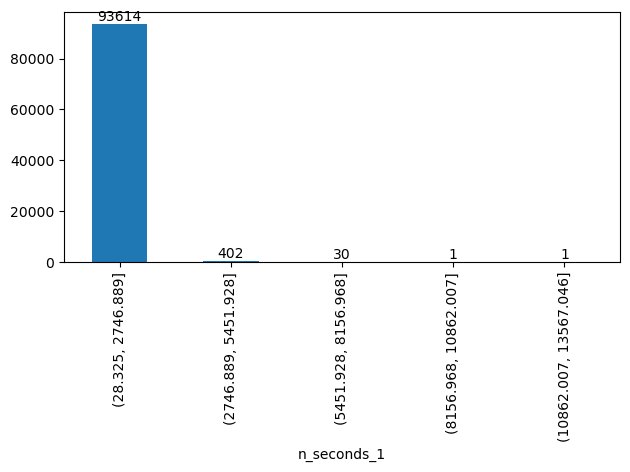

In [91]:
a = pd.cut(df.n_seconds_1, bins = 5).value_counts().sort_index().plot.bar()
plt.bar_label(a.containers[0])
plt.tight_layout()
plt.show()

In [92]:
df['n_seconds_1'].describe(percentiles = list(np.linspace(0.9, 1, 20)))

count    94048.000000
mean       432.779217
std        429.835563
min         41.850000
50%        306.946500
90%        853.901700
90.5%      877.046063
91.1%      902.822268
91.6%      929.459895
92.1%      956.574895
92.6%      987.339084
93.2%     1020.244463
93.7%     1057.317916
94.2%     1094.994300
94.7%     1141.126158
95.3%     1193.965995
95.8%     1252.876516
96.3%     1322.002942
96.8%     1407.744737
97.4%     1515.319974
97.9%     1646.132263
98.4%     1818.548663
98.9%     2120.611347
99.5%     2660.159668
100%     13567.046000
max      13567.046000
Name: n_seconds_1, dtype: float64

In [93]:
df['n_seconds_1'].quantile(0.99)

2150.45055

In [94]:
df.query("n_seconds_1 >= 853").shape[0]

9424

In [95]:
# from scipy.stats.mstats import winsorize

# df_no_outliers = df.copy()
# columns_to_winsorize = list(df.columns[1:4]) + list(df.columns[6:-9])
# for feature in df_no_outliers[columns_to_winsorize]:
#     winsorized = winsorize(df[feature], limits = (0.01, 0.01))
#     df_no_outliers.loc[df_no_outliers.index, feature] = winsorized

In [96]:
# doing initial checks before using IQR method to cap outliers to upper_bound and lower_bound
columns_for_IQR = list(df.columns[1:4]) + list(df.columns[6:-9])

for col in columns_for_IQR:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + IQR * 2.0
    lower_bound = Q1 - IQR * 2.0
    BM = df[col] > upper_bound
    upperb_outlier_index = df[BM].index
    upperb_outlier_index.size
    BM = df[col] < lower_bound
    lowerb_outlier_index = df[BM].index
    lowerb_outlier_index.size
    print(f"{col} has --> upperbound outliers: {upperb_outlier_index.size}, lowerbound outliers: {lowerb_outlier_index.size}")
# let's use 2.0 for columns other than n_seconds_x columns. for n_seconds_x columns, use a slightly higher multiplier to keep as many raw data as possible assuming spending that amount of seconds on a 
# bank menu is unreasonable. another option would be to replace them with NaN and impute them using techniques like MissForest.

n_seconds_1 has --> upperbound outliers: 3992, lowerbound outliers: 0
n_seconds_2 has --> upperbound outliers: 4173, lowerbound outliers: 0
n_seconds_3 has --> upperbound outliers: 4890, lowerbound outliers: 0
feature_0 has --> upperbound outliers: 223, lowerbound outliers: 106
feature_1 has --> upperbound outliers: 130, lowerbound outliers: 35
feature_2 has --> upperbound outliers: 29, lowerbound outliers: 212
feature_3 has --> upperbound outliers: 404, lowerbound outliers: 9
feature_4 has --> upperbound outliers: 0, lowerbound outliers: 393
feature_5 has --> upperbound outliers: 44, lowerbound outliers: 88
feature_6 has --> upperbound outliers: 28, lowerbound outliers: 314
feature_7 has --> upperbound outliers: 287, lowerbound outliers: 42
feature_8 has --> upperbound outliers: 652, lowerbound outliers: 49
feature_9 has --> upperbound outliers: 0, lowerbound outliers: 147
feature_10 has --> upperbound outliers: 78, lowerbound outliers: 82
feature_11 has --> upperbound outliers: 247, 

In [97]:
n_seconds_columns = list(df.columns[1:4])

for col in n_seconds_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + IQR * 3.0
    lower_bound = Q1 - IQR * 3.0
    BM = df[col] > upper_bound
    upperb_outlier_index = df[BM].index
    upperb_outlier_index.size
    print(f"{col} has --> upperbound outliers: {upperb_outlier_index.size}, lowerbound outliers: {lowerb_outlier_index.size}")

n_seconds_1 has --> upperbound outliers: 2130, lowerbound outliers: 0
n_seconds_2 has --> upperbound outliers: 1893, lowerbound outliers: 0
n_seconds_3 has --> upperbound outliers: 2586, lowerbound outliers: 0


In [98]:
# use IQR method to cap outliers to upper_bound and lower_bound

df_no_outliers = df.copy()

for col in columns_for_IQR:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    if col in n_seconds_columns:
        upper_bound = Q3 + IQR * 3.0
        lower_bound = Q1 - IQR * 3.0
    else:
        upper_bound = Q3 + IQR * 2.0
        lower_bound = Q1 - IQR * 2.0        
    BM = df_no_outliers[col] > upper_bound
    outlier_index = df_no_outliers[BM].index
    df_no_outliers.loc[outlier_index, col] = upper_bound
    BM = df_no_outliers[col] < lower_bound
    outlier_index = df_no_outliers[BM].index
    df_no_outliers.loc[outlier_index, col] = lower_bound

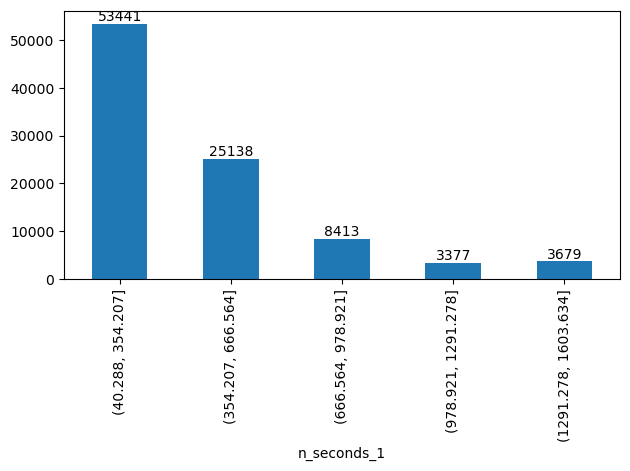

In [99]:
a = pd.cut(df_no_outliers.n_seconds_1, bins = 5).value_counts().sort_index().plot.bar()
plt.bar_label(a.containers[0])
plt.tight_layout()
plt.show()

#### MULTIVARIATE OUTLIER ELIMINATION

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False), cat_cols) # can also try and see the results without including encoded categorical columns
    ])
preprocessor.set_output(transform="pandas")

X = df_no_outliers.iloc[:, :-9]
y = df_no_outliers.iloc[:, -9:]

In [101]:
# i won't create validation sets as I'll use either randomizedsearchcv or bayessearchcv

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2, shuffle = True, stratify = y)

preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [102]:
X_train_transformed

num__month  num__n_seconds_1  num__n_seconds_2  num__n_seconds_3  \
35101         0.0         -0.123228          0.739023          0.739062   
2302         -1.0          0.737297          0.573276         -0.524317   
58680         1.0          0.929427          3.228682          3.676110   
8551         -1.0         -0.217558          0.080307          0.590445   
88853         1.0         -0.498378         -0.658148         -0.515968   
...           ...               ...               ...               ...   
56685         1.0          1.200766          1.739915          1.992419   
32403         0.0          0.003719         -0.297496          0.025567   
40968         0.0         -0.346409         -0.396343         -0.222111   
9368         -1.0         -0.277198         -0.489949         -0.366907   
46306         0.0         -0.531772         -0.437687         -0.074155   

       num__feature_0  num__feature_1  num__feature_2  num__feature_3  \
35101        0.668855        0.995279        0.113275       -0.047399   
2302        -0.100260       -1.012880       -0.814686       -0.848591   
58680       -0.451490        1.332794       -0.053823       -0.471019   
8551         0.267365        1.752026       -0.544196        0.504984   
88853        0.240417       -0.074987       -0.256152        1.122323   
...               ...             ...             ...             ...   
56685        0.086827       -0.117707       -0.710308       -1.044562   
32403       -0.093825       -0.294301        0.628519        0.544988   
40968       -0.276398       -0.356126        0.085056       -1.402282   
9368        -1.097114       -0.517722       -0.140683       -0.229122   
46306       -0.429566       -0.314190        0.097764       -0.430122   

       num__feature_4  num__feature_5  ...  cat__devicebrand_REDMI  \
35101       -0.557831       -0.124433  ...                     1.0   
2302         0.901899        0.606192  ...                     0.0   
58680        0.625871        0.750645  ...                     0.0   
8551         0.176059        0.170110  ...                     0.0   
88853        0.334576        0.191793  ...                     0.0   
...               ...             ...  ...                     ...   
56685       -1.506950       -0.217669  ...                     0.0   
32403        0.190292       -0.079291  ...                     0.0   
40968        0.223746       -0.728597  ...                     0.0   
9368         0.472690       -0.005284  ...                     0.0   
46306        0.091969        1.319117  ...                     0.0   

       cat__devicebrand_REEDER  cat__devicebrand_SAMSUNG  \
35101                      0.0                       0.0   
2302                       0.0                       1.0   
58680                      0.0                       1.0   
8551                       0.0                       0.0   
88853                      0.0                       0.0   
...                        ...                       ...   
56685                      0.0                       1.0   
32403                      0.0                       0.0   
40968                      0.0                       0.0   
9368                       0.0                       1.0   
46306                      0.0                       0.0   

       cat__devicebrand_SONY  cat__devicebrand_TCL  cat__devicebrand_TECNO  \
35101                    0.0                   0.0                     0.0   
2302                     0.0                   0.0                     0.0   
58680                    0.0                   0.0                     0.0   
8551                     0.0                   0.0                     0.0   
88853                    0.0                   0.0                     0.0   
...                      ...                   ...                     ...   
56685                    0.0                   0.0                     0.0   
32403                    0.0               

In [103]:
from sklearn.ensemble import IsolationForest

auto_detection = IsolationForest(max_samples = 'auto', contamination = 0.005, random_state = 1, n_jobs = -1)
auto_detection.fit(X_train_transformed)

evaluation = auto_detection.predict(X_train_transformed)
X_train_cleaned = X_train_transformed[evaluation == 1]
y_train_cleaned = y_train[evaluation == 1]

evaluation_2 = auto_detection.predict(X_test_transformed)
X_test_cleaned = X_test_transformed[evaluation_2 == 1]
y_test_cleaned = y_test[evaluation_2 == 1]

In [104]:
X_train_cleaned

num__month  num__n_seconds_1  num__n_seconds_2  num__n_seconds_3  \
35101         0.0         -0.123228          0.739023          0.739062   
2302         -1.0          0.737297          0.573276         -0.524317   
58680         1.0          0.929427          3.228682          3.676110   
8551         -1.0         -0.217558          0.080307          0.590445   
88853         1.0         -0.498378         -0.658148         -0.515968   
...           ...               ...               ...               ...   
56685         1.0          1.200766          1.739915          1.992419   
32403         0.0          0.003719         -0.297496          0.025567   
40968         0.0         -0.346409         -0.396343         -0.222111   
9368         -1.0         -0.277198         -0.489949         -0.366907   
46306         0.0         -0.531772         -0.437687         -0.074155   

       num__feature_0  num__feature_1  num__feature_2  num__feature_3  \
35101        0.668855        0.995279        0.113275       -0.047399   
2302        -0.100260       -1.012880       -0.814686       -0.848591   
58680       -0.451490        1.332794       -0.053823       -0.471019   
8551         0.267365        1.752026       -0.544196        0.504984   
88853        0.240417       -0.074987       -0.256152        1.122323   
...               ...             ...             ...             ...   
56685        0.086827       -0.117707       -0.710308       -1.044562   
32403       -0.093825       -0.294301        0.628519        0.544988   
40968       -0.276398       -0.356126        0.085056       -1.402282   
9368        -1.097114       -0.517722       -0.140683       -0.229122   
46306       -0.429566       -0.314190        0.097764       -0.430122   

       num__feature_4  num__feature_5  ...  cat__devicebrand_REDMI  \
35101       -0.557831       -0.124433  ...                     1.0   
2302         0.901899        0.606192  ...                     0.0   
58680        0.625871        0.750645  ...                     0.0   
8551         0.176059        0.170110  ...                     0.0   
88853        0.334576        0.191793  ...                     0.0   
...               ...             ...  ...                     ...   
56685       -1.506950       -0.217669  ...                     0.0   
32403        0.190292       -0.079291  ...                     0.0   
40968        0.223746       -0.728597  ...                     0.0   
9368         0.472690       -0.005284  ...                     0.0   
46306        0.091969        1.319117  ...                     0.0   

       cat__devicebrand_REEDER  cat__devicebrand_SAMSUNG  \
35101                      0.0                       0.0   
2302                       0.0                       1.0   
58680                      0.0                       1.0   
8551                       0.0                       0.0   
88853                      0.0                       0.0   
...                        ...                       ...   
56685                      0.0                       1.0   
32403                      0.0                       0.0   
40968                      0.0                       0.0   
9368                       0.0                       1.0   
46306                      0.0                       0.0   

       cat__devicebrand_SONY  cat__devicebrand_TCL  cat__devicebrand_TECNO  \
35101                    0.0                   0.0                     0.0   
2302                     0.0                   0.0                     0.0   
58680                    0.0                   0.0                     0.0   
8551                     0.0                   0.0                     0.0   
88853                    0.0                   0.0                     0.0   
...                      ...                   ...                     ...   
56685                    0.0                   0.0                     0.0   
32403                    0.0               

In [105]:
# check size
X_train_cleaned.shape, X_train_transformed.shape, X_test_cleaned.shape, X_test_transformed.shape

((74861, 100), (75238, 100), (18705, 100), (18810, 100))

In [106]:
X_train_transformed[evaluation == -1].index

Index([61008, 15020, 63582, 50437, 49383, 60652, 50102, 16711, 73308,   114,
       ...
       40866, 36652, 21397, 10652, 59896, 80292, 84938, 61696,  3267, 62957],
      dtype='int64', length=377)

In [107]:
X_test_transformed[evaluation_2 == -1].index

Index([  692, 75121, 84826, 60357, 54748, 81686, 11620, 48191,   335, 14752,
       ...
       75973, 26379, 60162, 52675, 59400, 15780,  9474, 16299, 22977, 20278],
      dtype='int64', length=105)

In [108]:
suspected_outlier_indeces = X_train_transformed[evaluation == -1].index.tolist() + X_test_transformed[evaluation_2 == -1].index.tolist()

In [109]:
suspected_outliers = df_no_outliers.iloc[suspected_outlier_indeces, :]
suspected_outliers

month  n_seconds_1  n_seconds_2  n_seconds_3      carrier devicebrand  \
61008     12     557.2440    181.43300       62.960  VODAFONE TR      HUAWEI   
15020     10      59.2880     52.27500       44.606        other       APPLE   
63582     12     495.8630    436.04300       99.805        other       APPLE   
50437     12    1603.6345    690.34975      314.881  VODAFONE TR     SAMSUNG   
49383     11      62.6990     61.87200       45.968     TURKCELL       REDMI   
...      ...          ...          ...          ...          ...         ...   
15780     11    1577.0250    111.52400       84.033  VODAFONE TR       REDMI   
9474      10     205.3660    121.16800      104.435  VODAFONE TR        POCO   
16299     11    1290.5100    398.05500      151.333        other       APPLE   
22977     11     557.7540    245.72200       91.780      Unknown     SAMSUNG   
20278     11     689.1700    322.25300      314.881  VODAFONE TR       APPLE   

       feature_0  feature_1  feature_2  feature_3  ...  feature_49  menu1  \
61008   0.428805   2.002221  -1.397912   2.069637  ...          66      0   
15020  -0.501851   2.441824  -2.798890  -0.005135  ...          41      0   
63582  -2.295207   2.279934   0.356601   1.405461  ...          35      0   
50437  -2.401631   2.338157  -0.771753   2.811608  ...          54      0   
49383   0.441244   2.310934  -1.938111   1.848077  ...          59      1   
...          ...        ...        ...        ...  ...         ...    ...   
15780  -0.259287   2.204649  -1.521875   1.993910  ...          32      0   
9474   -0.546439   0.541496  -1.851381  -0.785419  ...          40      0   
16299  -0.579144   2.198791  -1.760883  -0.172996  ...          50      0   
22977  -0.058520   0.678430  -0.885073  -0.751038  ...          67      1   
20278  -0.714408  -0.229853  -1.496166   2.893006  ...          64      0   

       menu2  menu3  menu4  menu5  menu6  menu7  menu8  menu9  
61008      1      0      1      0      1      0      0      0  
15020      0      1      1      0      0      0      1      0  
63582      1      0      0      0      1      0      1      0  
50437      1      0      1      0      0      0      1      0  
49383      1      0      0      0      1      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
15780      1      0      1      1      0      0      0      0  
9474       1      0      1      0      1      0      0      0  
16299      1      0      1      0      1      0      0      0  
22977      1      0      0      0      1      0      0      0  
20278      1      0      0      1      1      0      0      0  

[482 rows x 65 columns]

In [110]:
suspected_outliers.loc[49383, :]

month                11
n_seconds_1      62.699
n_seconds_2      61.872
n_seconds_3      45.968
carrier        TURKCELL
                 ...   
menu5                 0
menu6                 1
menu7                 0
menu8                 0
menu9                 0
Name: 49383, Length: 65, dtype: object

In [111]:
df_no_outliers.shape

(94048, 65)

In [112]:
df_no_outliers.drop(index = suspected_outliers.index.tolist(), inplace = True) # using the df_no_outliers dataframe and not moving forward with the transformed dataset as I'd like to do different
                                                                               # transformations on numerical columns for machine learning. I used robustscaler only for outlier detection.
df_no_outliers.shape

(93566, 65)

In [113]:
X_train_cleaned.shape[0] + X_test_cleaned.shape[0] # result is equal to the result above

93566

In [114]:
# another sanity check. checking if index 45796 is in df_no_outliers which is an outlier's index
try:
    df_no_outliers.loc[49383, :]
except:
    print("index 49383 isn't there")

index 49383 isn't there


<Axes: >

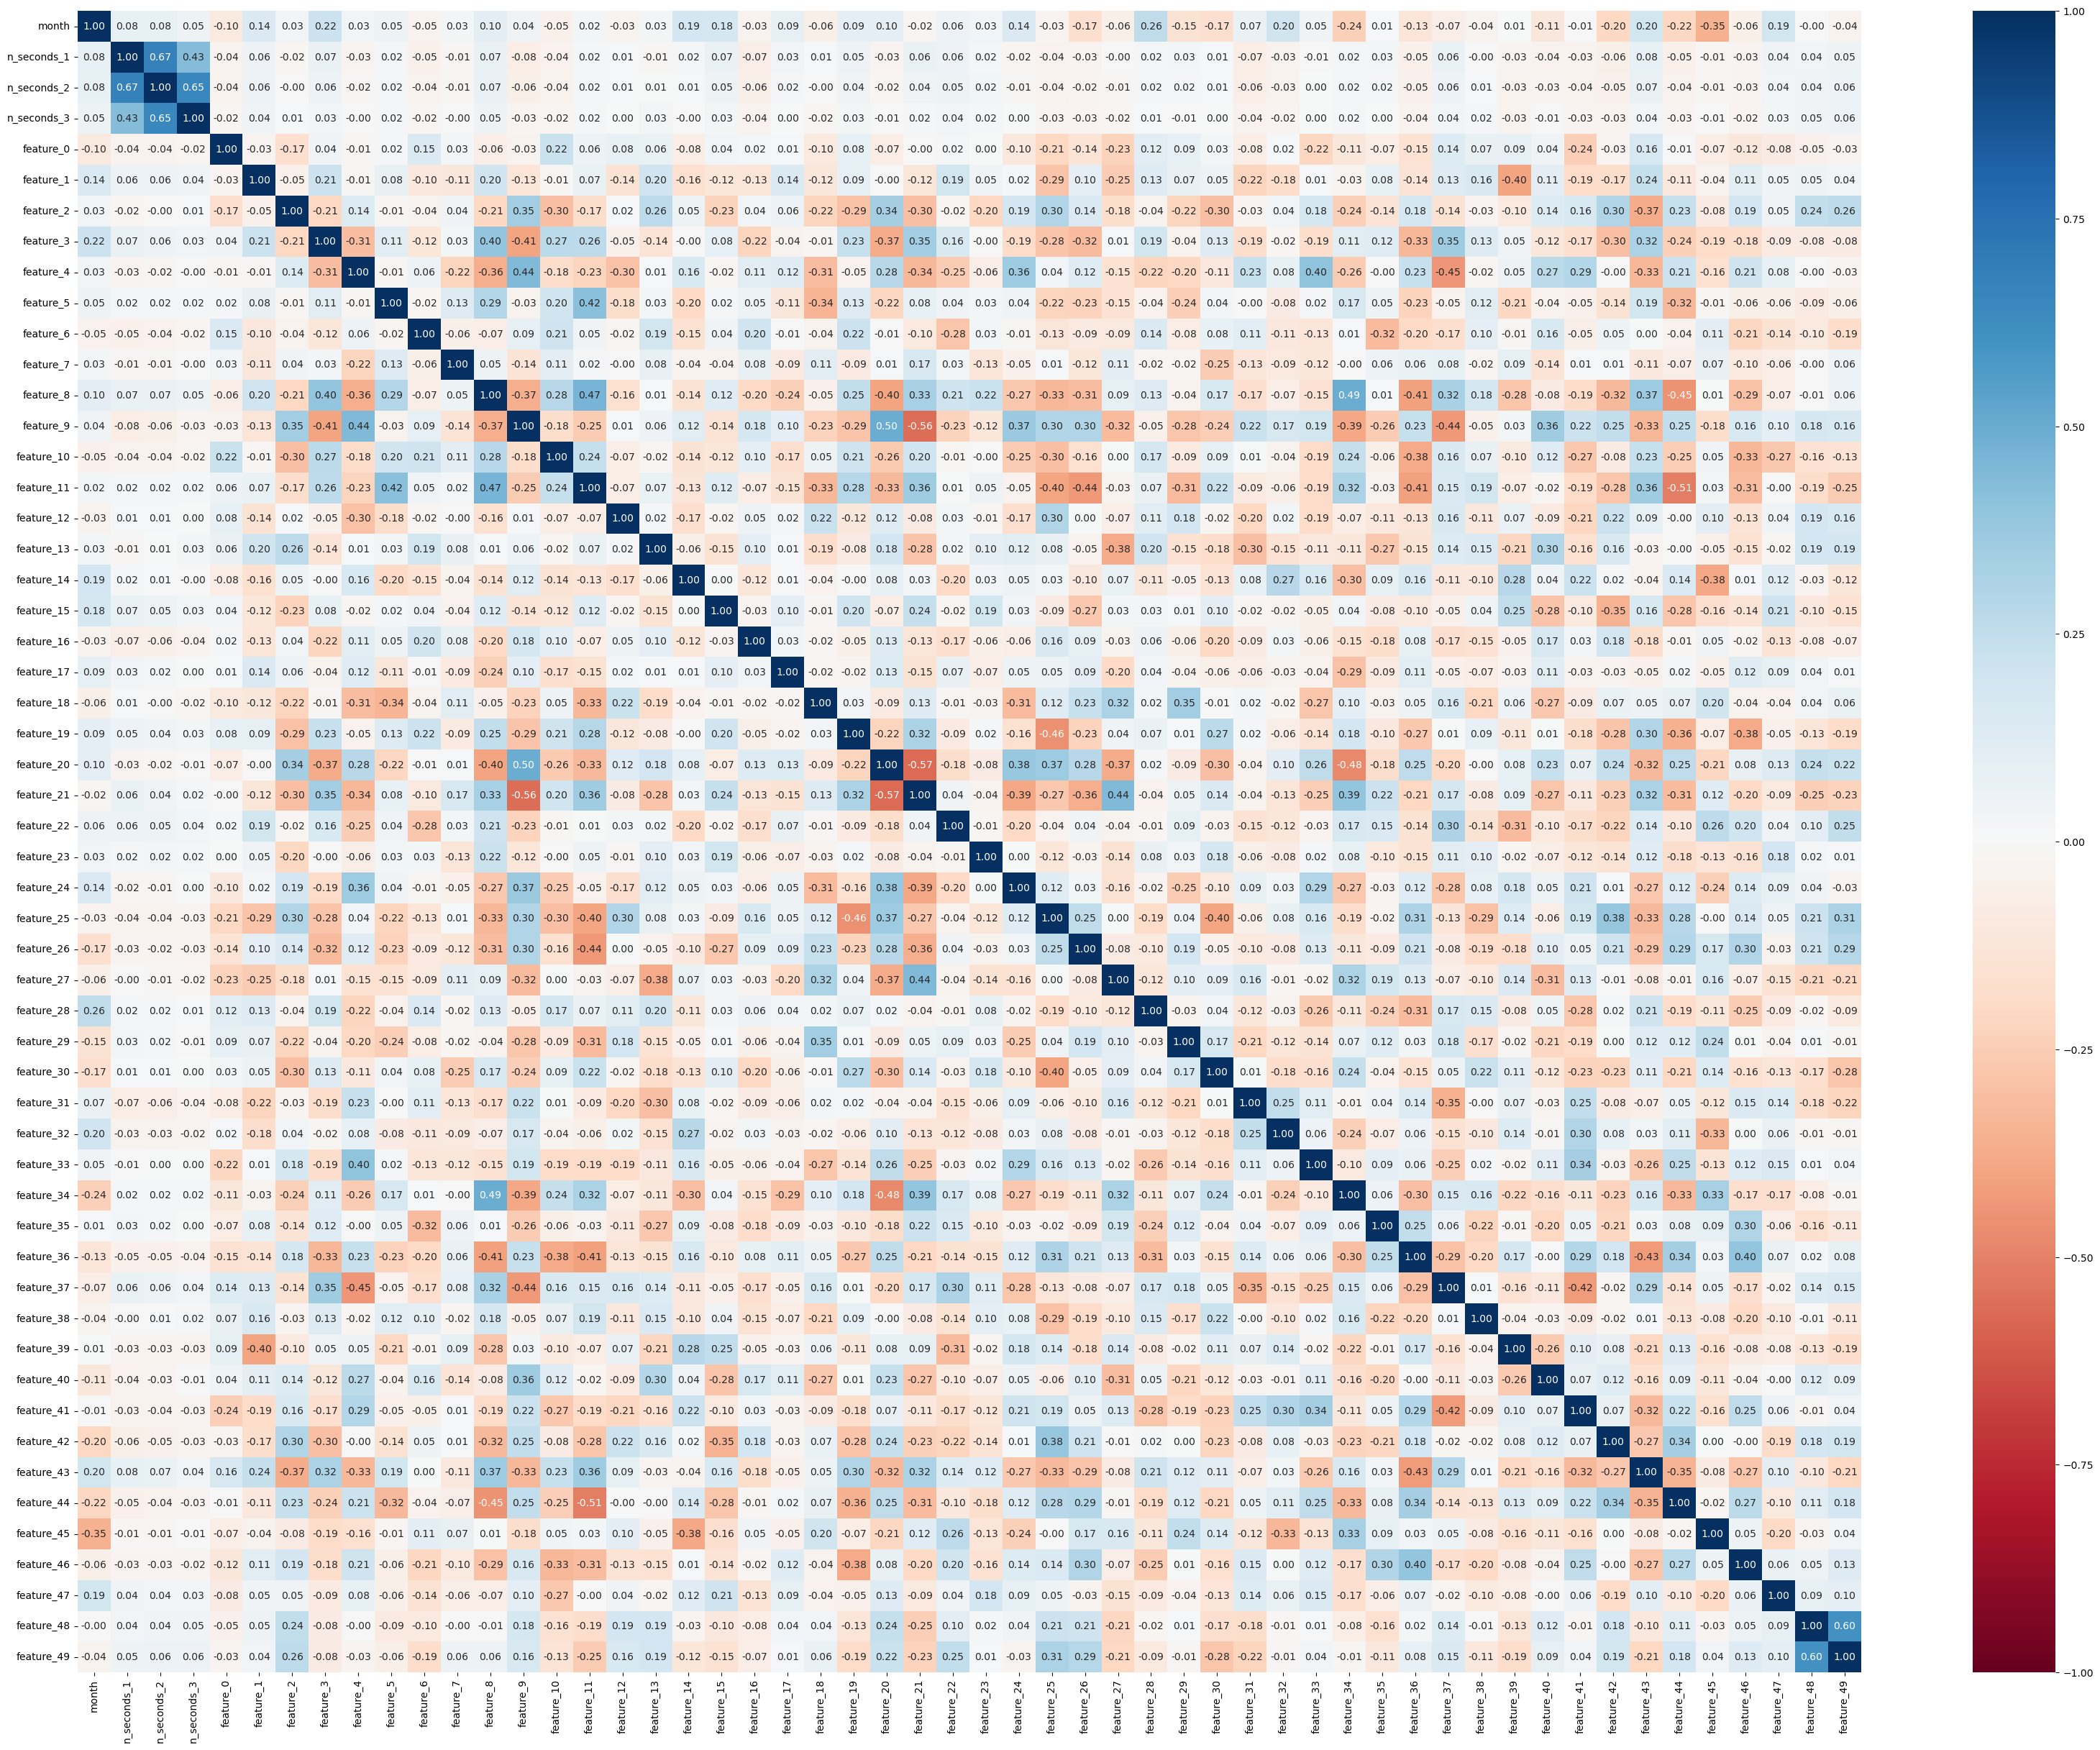

In [126]:
# check correlations

import seaborn as sns

fig, ax = plt.subplots(figsize = (40, 30))
sns.heatmap(df_no_outliers[num_cols].corr(method = 'spearman'), cmap = 'RdBu', annot = True , fmt = '.2f', vmin = -1, vmax = 1, ax = ax) # no significant correlation

<Axes: >

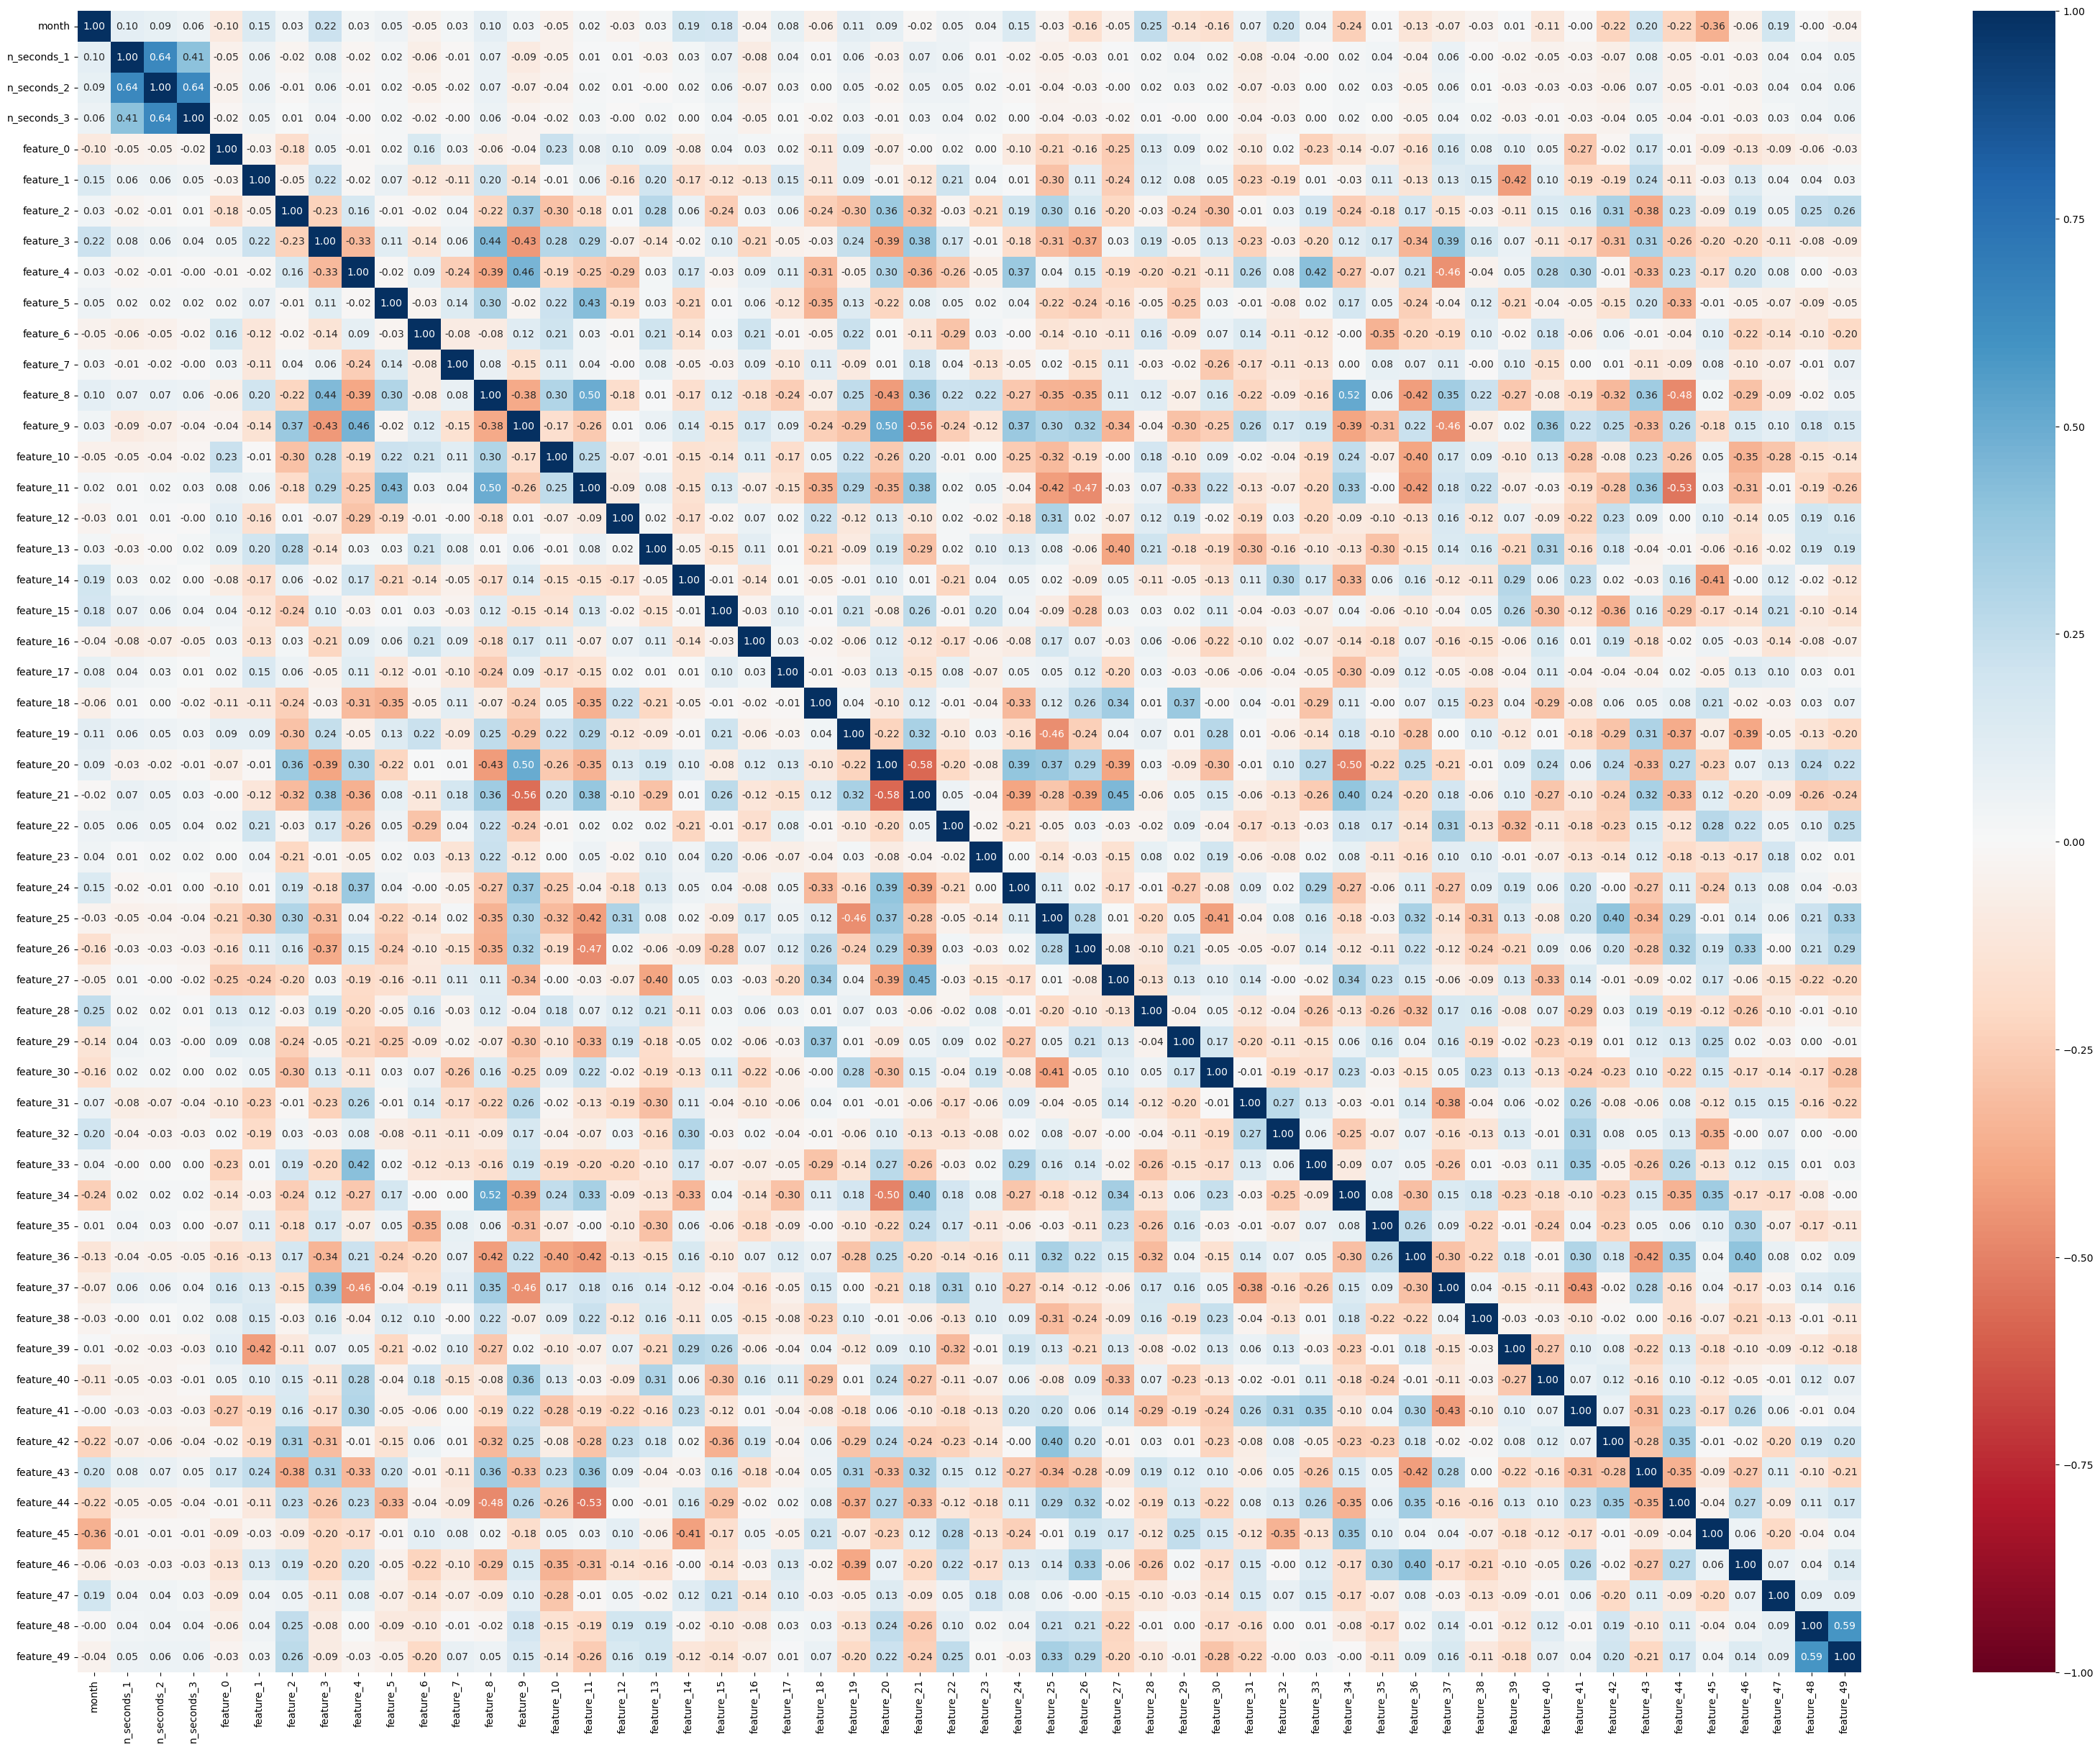

In [127]:
fig, ax = plt.subplots(figsize = (40, 30))
sns.heatmap(df_no_outliers[num_cols].corr(method = 'pearson'), cmap b= 'RdBu', annot = True , fmt = '.2f', vmin = -1, vmax = 1, ax = ax)

In [133]:
# check for differences between spearman and pearson
(abs((df_no_outliers[num_cols].corr(method="spearman") - df_no_outliers[num_cols].corr(method='pearson'))) > 0.1).sum().sum() # no significant difference

0

In [116]:
# check multicollinearity severity just for EDA purposes.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


df_vif = df_no_outliers[num_cols].copy()
vif_data = pd.DataFrame()
vif_data["Variable"] = num_cols
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

vif_data = vif_data.sort_values('VIF', ascending=False)

In [117]:
print(vif_data)

       Variable         VIF
39   feature_35  460.990256
0         month  330.754882
8     feature_4  160.092207
35   feature_31  158.673382
18   feature_14  138.077290
13    feature_9  131.184023
16   feature_12  115.610110
42   feature_38   96.258312
9     feature_5   79.576403
51   feature_47   61.253122
19   feature_15   56.686673
21   feature_17   54.693381
5     feature_1   47.673873
20   feature_16   44.384372
4     feature_0   43.187415
46   feature_42   41.055988
53   feature_49   40.629008
24   feature_20   39.236826
40   feature_36   37.905108
23   feature_19   35.167859
31   feature_27   27.928495
30   feature_26   27.869456
25   feature_21   25.463094
45   feature_41   22.658967
17   feature_13   21.931271
43   feature_39   21.538040
33   feature_29   20.862046
44   feature_40   20.144233
47   feature_43   18.291098
15   feature_11   16.947429
12    feature_8   16.586580
49   feature_45   14.497593
50   feature_46   13.853601
41   feature_37   12.320245
52   feature_48   12

In [118]:
vif_data['Severity'] = vif_data['VIF'].apply(lambda x: 
    'Severe multicollinearity' if x > 10 
    else ('Moderate multicollinearity' if x > 5 
    else 'Low multicollinearity'))

In [121]:
vif_data

Variable         VIF              Interpretation
39   feature_35  460.990256    Severe multicollinearity
0         month  330.754882    Severe multicollinearity
8     feature_4  160.092207    Severe multicollinearity
35   feature_31  158.673382    Severe multicollinearity
18   feature_14  138.077290    Severe multicollinearity
13    feature_9  131.184023    Severe multicollinearity
16   feature_12  115.610110    Severe multicollinearity
42   feature_38   96.258312    Severe multicollinearity
9     feature_5   79.576403    Severe multicollinearity
51   feature_47   61.253122    Severe multicollinearity
19   feature_15   56.686673    Severe multicollinearity
21   feature_17   54.693381    Severe multicollinearity
5     feature_1   47.673873    Severe multicollinearity
20   feature_16   44.384372    Severe multicollinearity
4     feature_0   43.187415    Severe multicollinearity
46   feature_42   41.055988    Severe multicollinearity
53   feature_49   40.629008    Severe multicollinearity
24   feature_20   39.236826    Severe multicollinearity
40   feature_36   37.905108    Severe multicollinearity
23   feature_19   35.167859    Severe multicollinearity
31   feature_27   27.928495    Severe multicollinearity
30   feature_26   27.869456    Severe multicollinearity
25   feature_21   25.463094    Severe multicollinearity
45   feature_41   22.658967    Severe multicollinearity
17   feature_13   21.931271    Severe multicollinearity
43   feature_39   21.538040    Severe multicollinearity
33   feature_29   20.862046    Severe multicollinearity
44   feature_40   20.144233    Severe multicollinearity
47   feature_43   18.291098    Severe multicollinearity
15   feature_11   16.947429    Severe multicollinearity
12    feature_8   16.586580    Severe multicollinearity
49   feature_45   14.497593    Severe multicollinearity
50   feature_46   13.853601    Severe multicollinearity
41   feature_37   12.320245    Severe multicollinearity
52   feature_48   12.304763    Severe multicollinearity
26   feature_22   11.850787    Severe multicollinearity
10    feature_6   11.840254    Severe multicollinearity
34   feature_30   11.781074    Severe multicollinearity
32   feature_28   11.752090    Severe multicollinearity
37   feature_33   10.904415    Severe multicollinearity
7     feature_3   10.829145    Severe multicollinearity
28   feature_24   10.372050    Severe multicollinearity
48   feature_44   10.308703    Severe multicollinearity
38   feature_34    9.786391  Moderate multicollinearity
29   feature_25    9.545615  Moderate multicollinearity
6     feature_2    8.225670  Moderate multicollinearity
14   feature_10    8.187656  Moderate multicollinearity
11    feature_7    8.082327  Moderate multicollinearity
22   feature_18    8.020774  Moderate multicollinearity
2   n_seconds_2    6.762396  Moderate multicollinearity
3   n_seconds_3    5.697294  Moderate multicollinearity
27   feature_23    5.148672  Moderate multicollinearity
36   feature_32    5.037741  Moderate multicollinearity
1   n_seconds_1    4.396076       Low multicollinearity

In [ ]:
# do the same for the transformed data to check

pt_1 = PowerTransformer(method='yeo-johnson', standardize=True)
df_no_outliers_copy = df_no_outliers.copy()
df_no_outliers_copy.drop(columns = ['devicebrand', 'carrier'] + menus, inplace = True)
df_no_outliers_copy_trans = pt_1.fit_transform(df_no_outliers_copy)

In [ ]:
fig, ax = plt.subplots(figsize = (40, 30))
sns.heatmap(df_no_outliers_copy_trans[num_cols].corr(method = 'spearman'), cmap = 'RdBu', annot = True , fmt = '.2f', vmin = -1, vmax = 1, ax = ax) # no significant correlation

In [ ]:
fig, ax = plt.subplots(figsize = (40, 30))
sns.heatmap(df_no_outliers_copy_trans[num_cols].corr(method = 'pearson'), cmap b= 'RdBu', annot = True , fmt = '.2f', vmin = -1, vmax = 1, ax = ax)

In [ ]:
# check for differences between spearman and pearson
(abs((df_no_outliers_copy_trans[num_cols].corr(method="spearman") - df_no_outliers_copy_trans[num_cols].corr(method='pearson'))) > 0.1).sum().sum() # no significant difference

In [ ]:
df_vif_1 = df_no_outliers_copy_trans[num_cols].copy()
vif_data_1 = pd.DataFrame()
vif_data_1["Variable"] = num_cols
vif_data_1["VIF"] = [variance_inflation_factor(df_vif_1.values, i) for i in range(df_vif_1.shape[1])]

vif_data_1 = vif_data_1.sort_values('VIF', ascending=False)

In [ ]:
print(vif_data_1)

### FEATURE SELECTION and TRANSFORMATION

In [ ]:
# print(pd.options.display.max_rows, pd.options.display.max_columns)

In [ ]:
# # check correlation matrix

# pd.options.display.max_rows = 63
# pd.options.display.max_columns = 63

# numerical_features = list(df.columns[0:4]) + list(df.columns[6:-9])

# corr_table = df_no_outliers[numerical_features].corr(method = 'pearson')
# BM = (corr_table > 0.2) | (corr_table < -0.2) # 0.7 degeri icin kontrol edildiginde hicbir korelasyon degeri bu degeri asmiyor.
# corr_table[BM]

In [ ]:
# corr_table = df_no_outliers[numerical_features].corr(method = 'spearman')
# BM = (corr_table > 0.2) | (corr_table < -0.2) # 0.7 degeri icin kontrol edildiginde hicbir korelasyon degeri bu degeri asmiyor.
# corr_table[BM]

In [49]:
# yukaridaki iki tabloya bakarak pca'e gerek yok denebilir korelasyonlar ciddi olmadigi icin (>0.7 ve <-0.7 degerleri yok).
# ama genede deneyelim modellemede kullanilacak optimal komponent range'ini bulmak icin:

In [50]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 20

In [51]:
df_no_outliers_cat_encoded = pd.get_dummies(data = df_no_outliers, columns = ['carrier', 'devicebrand'], dtype = float)

In [52]:
from sklearn.preprocessing import MinMaxScaler

df_no_outliers_cat_encoded_copy = df_no_outliers_cat_encoded.copy()
df_no_outliers_cat_encoded_copy_trans = pt.fit_transform(df_no_outliers_cat_encoded_copy)
scaler = MinMaxScaler()
df_no_outliers_cat_encoded_copy_trans_2 = scaler.fit_transform(df_no_outliers_cat_encoded_copy_trans)

In [53]:
from sklearn.decomposition import PCA

pca = PCA()
Xs = pd.DataFrame(df_no_outliers_cat_encoded_copy_trans_2).iloc[:, 0:-9]
pca.fit(Xs)
Xs_t = pd.DataFrame(pca.transform(Xs), index = Xs.index)
Xs_t.columns = ['PC{}'.format(i) for i in range(1, Xs.shape[1]+1)]

In [54]:
total_var = Xs_t.var().sum()
dic = {'var_perc': Xs_t.var() / total_var,
       'cum_var_perc': Xs_t.var().cumsum() / total_var
      }
explanation_df = pd.DataFrame(dic)
explanation_df

var_perc  cum_var_perc
PC1    7.556194e-02      0.075562
PC2    6.977719e-02      0.145339
PC3    6.335104e-02      0.208690
PC4    5.793544e-02      0.266626
PC5    5.074379e-02      0.317369
...             ...           ...
PC179  1.470691e-05      0.999975
PC180  1.273839e-05      0.999987
PC181  1.262761e-05      1.000000
PC182  1.291120e-27      1.000000
PC183  6.110038e-31      1.000000

[183 rows x 2 columns]

In [55]:
explanation_df.query("0.6 <= cum_var_perc <= 0.9")
# bu araliktaki komponentleri kullanacagim

var_perc  cum_var_perc
PC13  0.023884      0.607321
PC14  0.023588      0.630909
PC15  0.021944      0.652852
PC16  0.017447      0.670299
PC17  0.015974      0.686273
PC18  0.015033      0.701306
PC19  0.014443      0.715749
PC20  0.013739      0.729488
PC21  0.012685      0.742173
PC22  0.012226      0.754400
PC23  0.011148      0.765547
PC24  0.010509      0.776056
PC25  0.009782      0.785838
PC26  0.009471      0.795309
PC27  0.008920      0.804229
PC28  0.008440      0.812669
PC29  0.008165      0.820835
PC30  0.007874      0.828709
PC31  0.007541      0.836250
PC32  0.007407      0.843657
PC33  0.006375      0.850032
PC34  0.006289      0.856321
PC35  0.006201      0.862522
PC36  0.006039      0.868561
PC37  0.005916      0.874477
PC38  0.005818      0.880294
PC39  0.005614      0.885908
PC40  0.005369      0.891277
PC41  0.005154      0.896431

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, cross_val_predict
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from logitboost import LogitBoost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import jaccard_score
from sklearn.decomposition import TruncatedSVD 

In [ ]:
######################### Can also use PLSSVD in sklearn?????????????? ##################################

In [58]:
estimators = [RandomForestClassifier(), GradientBoostingClassifier()]
estimator_names = ['RF', 'GBC']
initial_models = [MultiOutputClassifier(SVC(kernel = 'rbf', cache_size = 1000, probability = True)),
                  MultiOutputClassifier(CalibratedClassifierCV(LinearSVC()), n_jobs = -1),
                  MultiOutputClassifier(ExtraTreesClassifier(), n_jobs = -1),  
                  MultiOutputClassifier(LogisticRegression(n_jobs = -1), n_jobs = -1), 
                  MultiOutputClassifier(KNeighborsClassifier(n_jobs = -1), n_jobs = -1), 
                  MultiOutputClassifier(RandomForestClassifier(n_jobs = -1), n_jobs = -1),
                  MultiOutputClassifier(LinearDiscriminantAnalysis(), n_jobs = -1),
                  MultiOutputClassifier(QuadraticDiscriminantAnalysis(), n_jobs = -1),
                  MultiOutputClassifier(GradientBoostingClassifier(), n_jobs = -1),
                  MultiOutputClassifier(LogitBoost(), n_jobs = -1),
                  MultiOutputClassifier(LGBMClassifier(), n_jobs = -1),
                  MultiOutputClassifier(XGBClassifier(use_label_encoder = False, n_jobs = -1), n_jobs = -1),
                  MultiOutputClassifier(BaggingClassifier(estimator = RandomForestClassifier(), n_jobs = -1), n_jobs = -1),
                  MultiOutputClassifier(BaggingClassifier(estimator = ExtraTreesClassifier(), n_jobs = -1), n_jobs = -1)
                 ]
initial_models_names = ['SVM', 'Linear SVM', 'ET', 'LR', 'KNN', 'RF', 'LDA', 'QDA', 'GB', 'LB', 'LGBM', 'XGB', 'BC-rf', 'BC-et']

#df_no_outliers.drop(columns = ['carrier', 'devicebrand'], inplace = True)
#df_no_outliers[target_list] = df_no_outliers[target_list].astype(np.int8)
#X = df_no_outliers.values[:, 0:-9]
#y = df_no_outliers.values[:, -9:]

X = df_no_outliers.iloc[:, 0:-9]
y = df_no_outliers.iloc[:, -9:]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state = 5, test_size = 0.2, shuffle = True, stratify = y) # should i be using train test split for multilabel problems?
                                                                                                                                        # is the use of stratify = y correct for multilabel problems?

In [59]:
numerical_features = list(df_no_outliers.columns[0:4]) + list(df_no_outliers.columns[6:-9])
numerical_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

categorical_features = list(df_no_outliers.columns[4:6])
categorical_transformer = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

preprocessor = ColumnTransformer(transformers = [('num', numerical_transformer, numerical_features),
                                                 ('cat', categorical_transformer, categorical_features)])

numerical_transformer_tsvd = Pipeline(steps = [('power_trans', PowerTransformer(method='yeo-johnson', standardize=True)),
                                              ('normalization', MinMaxScaler())])
                                     
preprocessor_tsvd = ColumnTransformer(transformers = [('num_tsvd', numerical_transformer_tsvd, numerical_features),
                                                 ('cat_tsvd', categorical_transformer, categorical_features)])

In [60]:
def get_models():
    models = dict()
    for model_name, model in zip(initial_models_names, initial_models):
        for estimator_name, estimator in zip(estimator_names, estimators):
            rfecv = RFECV(estimator = estimator, cv = 3, step = 2, n_jobs = -1)
            models[model_name + ' with estimator: ' + estimator_name] = Pipeline(steps = [('preprocessor', preprocessor), ('rfecv', rfecv), ('model', model)])
    return models


def get_models_tsvd():
    models_tsvd = dict()
    for model_name, model in zip(initial_models_names, initial_models):
        for no_of_components in range(13,41,4): # tsvd components to be tried
            models_tsvd[model_name + ' TSVD with ' + str(no_of_components) + ' components'] = Pipeline(steps = [('preprocessor_tsvd', preprocessor_tsvd), ('t', TruncatedSVD(n_components = no_of_components)), ('model_tsvd', model)])
    return models_tsvd

def get_model_catboost():
    model_catboost = dict()
    model_catboost['CATBoost'] = MultiOutputClassifier(CatBoostClassifier(cat_features = categorical_features, early_stopping_rounds = 7), n_jobs = -1)
    return model_catboost

def evaluate_model(model, X, y):
    #adjusted_y = np.argmax(y, axis=1) #adjust y_train so repeated stratified kfold can use it
    #cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 1)
    probabilities = cross_val_predict(model, X, y, cv = 5, method = 'predict_proba', n_jobs = -1)
    y_pred = np.empty([X.shape[0], 9], dtype = int)
    
    for i in range(0, X.shape[0]):
        a = np.array([probabilities[0][i][0], probabilities[1][i][0], probabilities[2][i][0], probabilities[3][i][0], 
                      probabilities[4][i][0], probabilities[5][i][0], probabilities[6][i][0], probabilities[7][i][0],
                    probabilities[8][i][0]])
        b = np.argsort(a)[0:3] # ilk uc en kucuk degeri sec
        zeros_array = np.zeros(shape = 9, dtype = int)
        row_to_append = np.put(zeros_array, list(b), 1) # zeros_array'deki referans edilen row'u degistir 1 degerleri ile
        y_pred[i] = zeros_array

    score = jaccard_score(y, y_pred, average = 'samples')
    return score

In [61]:
models = dict(get_models(), **get_models_tsvd(), **get_model_catboost())
result_df = pd.DataFrame(columns = ['Model name', 'Jaccard scores'])

In [62]:
len(models.keys())

99

In [65]:
models.keys()

dict_keys(['SVM TSVD with 13 components', 'SVM TSVD with 17 components', 'SVM TSVD with 21 components', 'SVM TSVD with 25 components', 'SVM TSVD with 29 components', 'SVM TSVD with 33 components', 'SVM TSVD with 37 components', 'Linear SVM TSVD with 13 components', 'Linear SVM TSVD with 17 components', 'Linear SVM TSVD with 21 components', 'Linear SVM TSVD with 25 components', 'Linear SVM TSVD with 29 components', 'Linear SVM TSVD with 33 components', 'Linear SVM TSVD with 37 components', 'ET TSVD with 13 components', 'ET TSVD with 17 components', 'ET TSVD with 21 components', 'ET TSVD with 25 components', 'ET TSVD with 29 components', 'ET TSVD with 33 components', 'ET TSVD with 37 components', 'LR TSVD with 13 components', 'LR TSVD with 17 components', 'LR TSVD with 21 components', 'LR TSVD with 25 components', 'LR TSVD with 29 components', 'LR TSVD with 33 components', 'LR TSVD with 37 components', 'KNN TSVD with 13 components', 'KNN TSVD with 17 components', 'KNN TSVD with 21 compon

In [ ]:
for name, model in models.items():
    score = evaluate_model(model, X_train, y_train)
    df_append = pd.DataFrame([[name, score]], columns = ['Model name', 'Jaccard scores'])
    result_df = pd.concat([result_df, df_append], ignore_index = True)

In [ ]:
======

In [ ]:
score = evaluate_model(models.get('BC-rf TSVD with 25 components'), X_train, y_train)
df_append = pd.DataFrame([['BC-rf TSVD with 25 components', score]], columns = ['Model name', 'Jaccard scores'])
result_df = pd.concat([result_df, df_append], ignore_index = True)

In [77]:
result_df

Model name  Jaccard scores
0   SVM TSVD with 13 components        0.531314
1   SVM TSVD with 17 components        0.536677
2   SVM TSVD with 21 components        0.542292
3   SVM TSVD with 25 components        0.546965
4  LGBM TSVD with 25 components        0.547232
5   XGB TSVD with 25 components        0.537243
6    ET TSVD with 25 components        0.542228
7    LB TSVD with 25 components        0.542282
8   QDA TSVD with 25 components        0.536201

In [ ]:
======

In [ ]:
=====

In [81]:
result_df = pd.DataFrame(columns = ['Model name', 'Jaccard scores'])
score = evaluate_model(MultiOutputClassifier(KNeighborsClassifier(n_jobs = -1), n_jobs = -1), X_train, y_train) #replace model here
df_append = pd.DataFrame([['testing', score]], columns = ['Model name', 'Jaccard scores'])
#dic_append = {'Model name': 'testing', 'Jaccard scores': score}
result_df = pd.concat([result_df, df_append], ignore_index = True)

In [42]:
X_train.shape

(74862, 54)

In [57]:
result_df

Empty DataFrame
Columns: [Model name, Jaccard scores]
Index: []

In [ ]:
=====